# ML Project

In [343]:
import time
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn as sk
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
import keras as keras
import datetime
import xgboost as xgb
import joblib
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [272]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Importing files and joining them

In [273]:
df = pd.read_csv('data/data.csv', index_col=0)
df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [274]:
df.shape

(801, 20531)

In [275]:
df.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [276]:
df_class = pd.read_csv('data/labels.csv', index_col=0)
df_class

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA
...,...
sample_796,BRCA
sample_797,LUAD
sample_798,COAD
sample_799,PRAD


In [277]:
# new_class = df_class["Class"]
# df = df.join(new_class)
# df


df = pd.concat([df, df_class], axis=1) #
df = df.copy()
df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,BRCA
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,LUAD
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,COAD
sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,PRAD


In [278]:
df.shape

(801, 20532)

In [279]:
Y = df.iloc[:,-1]
X = df.iloc[:,:-1]

X

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [280]:
X.shape

(801, 20531)

### Filter data if any genes contains only zeros

In [281]:
(X != 0).any(axis=0).value_counts() #Presence of 267 genes with null data

True     20264
False      267
dtype: int64

Filtering data allows the removal of 267 genes having null data on its entire column samples

In [282]:
X = X.loc[:,(X != 0).any(axis=0)]

In [283]:
X.shape # No change in shape

(801, 20264)

In [284]:
Y.unique() # 5 different classes

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [285]:
Y.shape

(801,)

## Encoding

In [286]:
Y_encoded = []
unique_tumours = {}
i = 0
for tumour_name in Y:
    if tumour_name not in unique_tumours:
        unique_tumours[tumour_name] = i
        i += 1
    
for value in Y:
    if value in unique_tumours:
        Y_encoded.append(unique_tumours[value])

Y_encoded

[0,
 1,
 0,
 0,
 2,
 0,
 3,
 0,
 2,
 0,
 2,
 3,
 0,
 2,
 2,
 2,
 1,
 3,
 3,
 0,
 2,
 3,
 1,
 2,
 3,
 1,
 4,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 0,
 2,
 3,
 1,
 2,
 2,
 3,
 0,
 0,
 3,
 3,
 2,
 0,
 4,
 2,
 1,
 2,
 1,
 2,
 0,
 4,
 2,
 2,
 4,
 3,
 2,
 1,
 3,
 2,
 1,
 0,
 4,
 2,
 0,
 3,
 2,
 3,
 2,
 2,
 1,
 2,
 1,
 2,
 3,
 0,
 4,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 3,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 4,
 2,
 0,
 2,
 2,
 3,
 2,
 3,
 1,
 3,
 1,
 4,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 3,
 3,
 3,
 2,
 2,
 1,
 3,
 1,
 2,
 0,
 0,
 0,
 2,
 3,
 1,
 4,
 2,
 4,
 2,
 2,
 3,
 1,
 2,
 3,
 4,
 2,
 0,
 2,
 3,
 1,
 4,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 3,
 2,
 0,
 1,
 4,
 3,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 3,
 4,
 3,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 3,
 1,
 3,
 3,
 1,
 2,
 3,
 0,
 2,
 1,
 1,
 0,
 4,
 2,
 3,
 0,
 3,
 4,
 2,
 3,
 3,
 1,
 0,
 0,
 1,
 1,
 3,
 2,
 2,
 4,


In [287]:
Y_bis = to_categorical(Y_encoded)
Y_bis

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [288]:
Y_bis.shape

(801, 5)

## Split into training and testing data

In [289]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_bis, test_size=0.3, random_state=42, stratify=Y_bis)

In [290]:
X_train.shape

(560, 20264)

In [291]:
Y_train.shape

(560, 5)

## Creating the model

In [292]:
# init = 'random_uniform'
# input_layer = Input(shape=(20264,))
# mid_layer = Dense(150, activation = 'relu', kernel_initializer = init)(input_layer)
# drop_1 = Dropout(0.1)(mid_layer)
# mid_layer_2 = Dense(100, activation = 'relu', kernel_initializer = init)(drop_1)
# drop_2 = Dropout(0.1)(mid_layer_2)
# mid_layer_3 = Dense(50, activation = 'relu', kernel_initializer = init)(drop_2)
# output_layer = Dense(5, activation = 'softmax', kernel_initializer = init)(mid_layer_3)

# Model building
def create_model(init = "random_uniform", layers = 2, neurons = 50, activation_hidden = "relu", activation_output = "softmax", loss = "categorical_crossentropy", optimizer = "adam", dropout_rate = 0.1):
    # create model
    model = Sequential()
    model.add(Input(shape=(20264,)))
    for _ in range(0, layers, 1):
        model.add(Dense(neurons, activation = activation_hidden, kernel_initializer = init))
        model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation = activation_output, kernel_initializer = init))
    # Compile model
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

In [293]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

/var/folders/p2/mpls35q15k5050t9ppyx93l40000gn/T/ipykernel_47033/120676901.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=1)


In [294]:
#batch_size = [x for x in range(32, 100, 32)]
epochs = [x for x in range(25, 78, 25)]
#optimizer = ['SGD', 'Adam', 'Adamax', 'Nadam'] #'RMSprop', 'Adagrad', 'Adadelta',
#loss = ["binary_crossentropy", 'categorical_crossentropy', 'sparse_categorical_crossentropy'] #'poisson', 'kl_divergence',
#init_mode = ['uniform', 'normal'] #'lecun_uniform', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'
#activation_hidden = ['softmax', 'sigmoid', 'linear'] #'softplus', 'softsign', 'relu', 'tanh', 'hard_sigmoid'
#activation_output = ['softmax', 'sigmoid', 'linear'] #'softplus', 'softsign', 'relu', 'tanh', 'hard_sigmoid'
#dropout_rate = [x * 0.1 for x in range(0, 4, 1)]
layers = [x for x in range(2, 4, 1)]
neurons = [x for x in range(20, 65, 20)]

In [295]:
param_grid = dict(# batch_size=batch_size, 
                  epochs=epochs, 
                #   init = init_mode, 
                #   activation_hidden = activation_hidden, 
                #   activation_output = activation_output, 
                #   dropout_rate = dropout_rate, 
                #   loss = loss, 
                #   optimizer = optimizer,
                  neurons = neurons,
                  layers = layers
                 )
param_grid

{'epochs': [25, 50, 75], 'neurons': [20, 40, 60], 'layers': [2, 3]}

In [296]:
# model = Model(input_layer,output_layer)
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=3)
grid_result = grid.fit(X_train, Y_train, use_multiprocessing=True, workers=-1)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


2022-01-09 14:26:26.820083: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-09 14:26:26.820226: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-01-09 14:26:26.820337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-09 14:26:26.820607: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-01-09 14:26:27.851434: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-09 14:26:27.886998: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-09 14:26:27.887123: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-09 14:26:27.895306: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-09 14:26:27.899380: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-09 14:26:27.899398: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-09 14:26:27.904141: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-09 14:26:27.912289: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/25
Epoch 1/25
Epoch 1/25
Epoch 1/25
Epoch 1/25
Epoch 1/25
Epoch 1/25
Epoch 1/25


2022-01-09 14:26:28.322325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:28.322348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:28.322349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:28.323989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:28.330891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:28.337182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:28.344666: I tensorflow/core/grappler/optimizers/cust

14/14 [==============================] - 1s 36ms/step - loss: 1.5058 - accuracy: 0.3616
Epoch 2/25
14/14 [==============================]14/14 [==============================] - 1s 38ms/step - loss: 1.5343 - accuracy: 0.3839
 - 1s 39ms/step - loss: 1.4487 - accuracy: 0.3884
Epoch 2/25
Epoch 2/25
14/14 [==============================] - 1s 37ms/step - loss: 1.6060 - accuracy: 0.3237
Epoch 2/25
14/14 [==============================] - 1s 45ms/step - loss: 1.7220 - accuracy: 0.3192
Epoch 2/25
14/14 [==============================] - 0s 22ms/step - loss: 1.4399 - accuracy: 0.3661
Epoch 3/25
14/14 [==============================] - 0s 27ms/step - loss: 1.3527 - accuracy: 0.4710
Epoch 3/25
14/14 [==============================] - 0s 30ms/step - loss: 1.3268 - accuracy: 0.4598
Epoch 3/25
14/14 [==============================] - 0s 35ms/step - loss: 1.1666 - accuracy: 0.5268
Epoch 3/25
14/14 [==============================] - 0s 35ms/step - loss: 1.3133 - accuracy: 0.4420
Epoch 3/25
14/14 [===

2022-01-09 14:26:36.263237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 0.1886 - accuracy: 0.9196
Epoch 18/25
4/4 [==============================] - 0s 24ms/step - loss: 0.1680 - accuracy: 0.8750ETA: 0s - loss: 0.1504 - accuracy: 0.9375
[CV 1/5] END ...epochs=25, layers=2, neurons=20;, score=0.875 total time=   9.8s
14/14 [==============================] - 0s 32ms/step - loss: 0.0078 - accuracy: 0.9978
Epoch 18/25
14/14 [==============================] - 0s 22ms/step - loss: 0.4832 - accuracy: 0.7857
Epoch 24/25
14/14 [==============================] - 0s 29ms/step - loss: 0.3305 - accuracy: 0.9152
Epoch 20/25
14/14 [==============================] - 0s 35ms/step - loss: 0.4544 - accuracy: 0.8058
Epoch 17/25
14/14 [==============================] - 0s 33ms/step - loss: 0.7231 - accuracy: 0.7254
Epoch 17/25
14/14 [==============================] - 1s 35ms/step - loss: 0.0393 - accuracy: 0.9888- loss: 0.3249 - accuracy: 0.9375 - ETA: 0s - loss: 0.0044 - accuracy: 1.00
Epoch 17/25
14/14 [==========

2022-01-09 14:26:37.320462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:37.507672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.0335 - accuracy: 0.9866
Epoch 18/25
14/14 [==============================] - 0s 33ms/step - loss: 0.0248 - accuracy: 0.9933
Epoch 20/25
14/14 [==============================] - 0s 30ms/step - loss: 0.3065 - accuracy: 0.9353- loss: 0.4751 - accuracy: 0.7734 - ETA: 0s - loss: 0.0357 - accuracy: 0.98
Epoch 22/25
4/4 [==============================] - 0s 31ms/step - loss: 0.2677 - accuracy: 0.8750
[CV 3/5] END ...epochs=25, layers=2, neurons=40;, score=0.875 total time=  11.0s
14/14 [==============================] - 0s 35ms/step - loss: 0.7194 - accuracy: 0.7143
Epoch 19/25
14/14 [==============================] - 1s 38ms/step - loss: 0.0538 - accuracy: 0.9754
Epoch 21/25
14/14 [==============================] - 0s 34ms/step - loss: 0.2951 - accuracy: 0.9330A: 0s - loss: 0.2371 - accuracy: 0.8969
Epoch 23/25
14/14 [==============================] - 0s 29ms/step - loss: 1.2821 - accuracy: 0.4330
Epoch 3/25
14/14 [=============

2022-01-09 14:26:39.015980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 2/14 [===>..........................] - ETA: 0s - loss: 0.0715 - accuracy: 0.9844Epoch 24/25
Epoch 21/25
14/14 [==============================] - 0s 31ms/step - loss: 0.6905 - accuracy: 0.7277
Epoch 22/25
14/14 [==============================] - 0s 31ms/step - loss: 0.4275 - accuracy: 0.8549A: 0s - loss: 0.1816 - accuracy: 0.90
Epoch 22/25
14/14 [==============================] - 0s 28ms/step - loss: 0.2069 - accuracy: 0.9063
Epoch 25/25
14/14 [==============================] - 1s 30ms/step - loss: 1.4957 - accuracy: 0.3929
Epoch 2/25
14/14 [==============================] - 1s 37ms/step - loss: 0.0111 - accuracy: 0.9933
Epoch 22/25
14/14 [==============================] - 0s 34ms/step - loss: 0.6870 - accuracy: 0.7254
Epoch 23/25
14/14 [==============================] - 0s 25ms/step - loss: 1.0506 - accuracy: 0.5938
Epoch 3/25
14/14 [==============================] - 0s 23ms/step - loss: 0.1887 - accuracy: 0.9107
Epoch 8/25
14/14 [==============================] - 0s 28ms/step - loss

2022-01-09 14:26:39.889942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 28ms/step - loss: 0.6759 - accuracy: 0.7321
Epoch 24/25
14/14 [==============================] - 0s 31ms/step - loss: 0.4169 - accuracy: 0.8482
Epoch 24/25
14/14 [==============================] - 0s 23ms/step - loss: 0.1531 - accuracy: 0.9263
Epoch 9/25
 1/14 [=>............................] - ETA: 0s - loss: 0.5141 - accuracy: 0.8438

2022-01-09 14:26:40.183107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 42ms/step - loss: 0.0534 - accuracy: 0.9911
[CV 2/5] END ...epochs=25, layers=2, neurons=20;, score=0.991 total time=  13.8s
14/14 [==============================] - 0s 31ms/step - loss: 0.0250 - accuracy: 0.9933
Epoch 24/25
14/14 [==============================] - 0s 28ms/step - loss: 0.6688 - accuracy: 0.7299
Epoch 25/25
14/14 [==============================] - 0s 30ms/step - loss: 0.4253 - accuracy: 0.8438
Epoch 25/25
14/14 [==============================] - 0s 25ms/step - loss: 0.1602 - accuracy: 0.9129
Epoch 10/25
14/14 [==============================] - 0s 26ms/step - loss: 0.3276 - accuracy: 0.9174
Epoch 5/25
 5/14 [=========>....................] - ETA: 0s - loss: 0.0926 - accuracy: 0.9688: 0s - loss: 0.6711 - accuracy: 0.7188 - ETA: 0s - loss: 0.3171 - accuracy: 0.87

2022-01-09 14:26:40.709284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.0234 - accuracy: 0.9955
Epoch 25/25
4/4 [==============================] - 0s 31ms/step - loss: 0.0143 - accuracy: 0.9911
[CV 2/5] END ...epochs=25, layers=2, neurons=40;, score=0.991 total time=  14.3s
14/14 [==============================] - 0s 26ms/step - loss: 0.1226 - accuracy: 0.9442
Epoch 11/25
14/14 [==============================] - 0s 30ms/step - loss: 0.2361 - accuracy: 0.9375
Epoch 6/25
14/14 [==============================] - 0s 20ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 12/25
Epoch 1/25
14/14 [==============================] - 0s 23ms/step - loss: 0.1519 - accuracy: 0.9464
Epoch 7/25
Epoch 1/25
3/4 [=====================>........] - ETA: 0s - loss: 0.3737 - accuracy: 0.9479

2022-01-09 14:26:41.417524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:41.418434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:41.498589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:41.555997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 37ms/step - loss: 0.4775 - accuracy: 0.8929
[CV 4/5] END ...epochs=25, layers=2, neurons=20;, score=0.893 total time=  15.0s
4/4 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 1.0000
[CV 1/5] END ...epochs=25, layers=2, neurons=40;, score=1.000 total time=  15.1s
14/14 [==============================] - 0s 25ms/step - loss: 0.1082 - accuracy: 0.9509
Epoch 8/25


2022-01-09 14:26:41.723133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 25ms/step - loss: 0.1208 - accuracy: 0.9397- loss: 0.1322 - accuracy: 0.9318 - ETA: 0s - loss: 0.1427 - accuracy: 0.94
Epoch 14/25
14/14 [==============================] - 1s 32ms/step - loss: 2.1690 - accuracy: 0.2857
Epoch 2/25
 6/14 [===========>..................] - ETA: 0s - loss: 0.0948 - accuracy: 0.9583

2022-01-09 14:26:42.127205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 36ms/step - loss: 0.1257 - accuracy: 0.9487
Epoch 9/25
14/14 [==============================] - 1s 36ms/step - loss: 0.0955 - accuracy: 0.9643A: 4s - loss: 1.9294 - accuracy: 0.
Epoch 15/25
14/14 [==============================] - 1s 40ms/step - loss: 1.9482 - accuracy: 0.3393
 - ETA: 0s - loss: 3.4102 - accuracy: 0.2812Epoch 2/25
14/14 [==============================] - 0s 28ms/step - loss: 1.3874 - accuracy: 0.4688A: 0s - loss: 0.0816 - accuracy: 0.95
Epoch 1/25
14/14 [==============================] - 0s 26ms/step - loss: 0.0956 - accuracy: 0.9665A: 0s - loss: 1.0546 - accuracy: 0.57
Epoch 16/25
14/14 [==============================] - 1s 34ms/step - loss: 2.0415 - accuracy: 0.2790
Epoch 2/25
14/14 [==============================] - 0s 32ms/step - loss: 1.3546 - accuracy: 0.4375
Epoch 3/25
14/14 [==============================] - 0s 24ms/step - loss: 1.0030 - accuracy: 0.5804
Epoch 4/25
14/14 [==============================] - 0s 30ms/step

2022-01-09 14:26:43.283571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:43.296040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:43.358696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 18/25
14/14 [==============================] - 0s 32ms/step - loss: 1.1726 - accuracy: 0.5156TA: 0s - loss: 0.0796 - accuracy: 0.96
Epoch 4/25
14/14 [==============================] - ETA: 0s - loss: 0.9618 - accuracy: 0.5625 - 0s 33ms/step - loss: 0.6677 - accuracy: 0.7545
 - ETA: 0s - loss: 2.2857 - accuracy: 0.1875Epoch 5/25
14/14 [==============================] - 1s 37ms/step - loss: 0.5299 - accuracy: 0.8304
Epoch 6/25
14/14 [==============================]Epoch 6/25 - loss: 0.8456 - accuracy: 0.50
 - 2s 50ms/step - loss: 1.9790 - accuracy: 0.2991
14/14 [==============================] - 2s 53ms/step - loss: 1.7902 - accuracy: 0.2768
Epoch 7/25
14/14 [==============================] - 2s 56ms/step - loss: 1.5534 - accuracy: 0.3125A: 0s - loss: 1.5464 - accuracy: 0.3149
Epoch 2/25
14/14 [==============================] - 1s 36ms/step - loss: 0.0768 - accuracy: 0.9643
Epoch 20/25
14/14 [==============================] - 1s 44ms/step - loss: 0.3047 - accuracy: 0.8929- loss: 1.

2022-01-09 14:26:47.858773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 40ms/step - loss: 0.2331 - accuracy: 0.9129
 - ETA: 0s - loss: 0.1936 - accuracy: 0.9187Epoch 12/25
 1/14 [=>............................] - ETA: 0s - loss: 0.0810 - accuracy: 0.9688[CV 4/5] END ...epochs=25, layers=2, neurons=40;, score=0.991 total time=  11.3s
Epoch 9/25
14/14 [==============================] - 1s 42ms/step - loss: 0.0734 - accuracy: 0.9710A: 0s - loss: 0.1468 - accuracy: 0.95
Epoch 15/25
14/14 [==============================] - 1s 46ms/step - loss: 0.1880 - accuracy: 0.9353A: 0s - loss: 0.0724 - accuracy: 0.96
Epoch 9/25
14/14 [==============================] - 1s 42ms/step - loss: 0.1364 - accuracy: 0.9598
Epoch 14/25
14/14 [==============================] - 1s 38ms/step - loss: 0.2088 - accuracy: 0.9174
Epoch 13/25
14/14 [==============================] - 1s 45ms/step - loss: 0.0746 - accuracy: 0.9688
Epoch 10/25
Epoch 16/25
14/14 [==============================] - 0s 33ms/step - loss: 0.1373 - accuracy: 0.9531
Epoch 10/

2022-01-09 14:26:50.504504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:50.578125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 38ms/step - loss: 0.2056 - accuracy: 0.9018- loss: 0.1925 - accuracy: 0.9087 - ETA: 0s - loss: 0.1426 - accuracy: 0.94
Epoch 17/25
14/14 [==============================] - 0s 36ms/step - loss: 0.1493 - accuracy: 0.9442
Epoch 20/25
4/4 [==============================] - 0s 32ms/step - loss: 0.0036 - accuracy: 1.0000
[CV 5/5] END ...epochs=25, layers=2, neurons=40;, score=1.000 total time=  12.7s
14/14 [==============================] - 1s 40ms/step - loss: 0.0331 - accuracy: 0.9933
Epoch 14/25
14/14 [==============================] - 1s 41ms/step - loss: 0.0996 - accuracy: 0.9621
Epoch 14/25
14/14 [==============================] - 1s 26ms/step - loss: 1.5660 - accuracy: 0.3080A: 0s - loss: 0.1168 - accuracy: 0.95
Epoch 2/25
14/14 [==============================] - 0s 33ms/step - loss: 0.1054 - accuracy: 0.9576
Epoch 21/25
14/14 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 1.00TA: 0s - loss: 0.0073 - accuracy: 1.0000 -

2022-01-09 14:26:52.894623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.9844 - 0s 36ms/step - loss: 0.0599 - accuracy: 0.9710
Epoch 25/25
14/14 [==============================] - 1s 40ms/step - loss: 0.1037 - accuracy: 0.9621A: 0s - loss: 0.0062 - accuracy: 1.00
Epoch 18/25=>........................] - ETA: 0s - loss: 0.0855 - accuracy: 0.9479
14/14 [==============================] - 0s 35ms/step - loss: 0.1658 - accuracy: 0.9174
Epoch 22/25
14/14 [==============================] - 0s 33ms/step - loss: 0.0568 - accuracy: 0.9821
Epoch 24/25
14/14 [==============================] - 0s 33ms/step - loss: 0.0062 - accuracy: 1.0000- loss: 0.1562 - accuracy: 0.9375 - ETA: 0s - loss: 0.0054 - accuracy: 1.00
Epoch 19/25
14/14 [==============================] - 1s 40ms/step - loss: 1.5514 - accuracy: 0.3237
Epoch 2/25
14/14 [==============================] - 0s 36ms/step - loss: 0.1365 - accuracy: 0.9308
Epoch 23/25
14/14 [==============================] - 0s 31ms/step - loss: 0.0233 - acc

2022-01-09 14:26:53.949685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 35ms/step - loss: 0.0579 - accuracy: 0.9754
Epoch 20/25
14/14 [==============================] - 0s 31ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 21/25
4/4 [==============================] - 0s 68ms/step - loss: 0.0289 - accuracy: 0.9911
[CV 1/5] END ...epochs=25, layers=2, neurons=60;, score=0.991 total time=  14.0s
14/14 [==============================] - 0s 32ms/step - loss: 0.0078 - accuracy: 0.9978
Epoch 21/25
14/14 [==============================] - 0s 28ms/step - loss: 0.8610 - accuracy: 0.6183
Epoch 10/25
14/14 [==============================] - 0s 25ms/step - loss: 0.1487 - accuracy: 0.9219
Epoch 4/25
1/4 [======>.......................] - ETA: 0s - loss: 0.0084 - accuracy: 1.000074

2022-01-09 14:26:54.604832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 34ms/step - loss: 0.0506 - accuracy: 0.9754
Epoch 21/25
14/14 [==============================] - 0s 32ms/step - loss: 0.0099 - accuracy: 0.9978
Epoch 22/25
14/14 [==============================] - 0s 29ms/step - loss: 0.0248 - accuracy: 0.9955
Epoch 11/25
Epoch 22/25
14/14 [==============================] - 0s 29ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 23/25
14/14 [==============================] - 0s 27ms/step - loss: 0.0249 - accuracy: 1.0000
Epoch 23/25
 - ETA: 0s - loss: 0.0149 - accuracy: 1.0000 3/14 [=====>........................] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000Epoch 1/25
14/14 [==============================] - 0s 28ms/step - loss: 1.1349 - accuracy: 0.3929
Epoch 6/25
14/14 [==============================] - 0s 28ms/step - loss: 0.8310 - accuracy: 0.6652
Epoch 13/25
14/14 [==============================] - 0s 25ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 23/25
Epoch 24/25


2022-01-09 14:26:55.390841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 0.0273 - accuracy: 0.9933
Epoch 24/25
14/14 [==============================] - 0s 24ms/step - loss: 0.8482 - accuracy: 0.6741


2022-01-09 14:26:55.666790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 7/25
14/14 [==============================] - 0s 24ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 14/25
Epoch 25/25
14/14 [==============================] - 0s 28ms/step - loss: 0.6239 - accuracy: 0.7344- ETA: 0s - loss: 0.0314 - accuracy: 1.00
Epoch 8/25


2022-01-09 14:26:55.975021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 28ms/step - loss: 0.7824 - accuracy: 0.6719
Epoch 15/25
14/14 [==============================] 6/14 [===========>..................] - 1s 34ms/step - loss: 1.5578 - accuracy: 0.3438
 - ETA: 0s - loss: 0.5527 - accuracy: 0.7708Epoch 2/25
14/14 [==============================] - 0s 32ms/step - loss: 0.0341 - accuracy: 0.9888
Epoch 25/25
14/14 [==============================] - 1s 29ms/step - loss: 1.5217 - accuracy: 0.3839
Epoch 2/25
14/14 [==============================] - 0s 26ms/step - loss: 0.7726 - accuracy: 0.6540- loss: 0.4673 - accuracy: 0.7708 - ETA: 0s - loss: 1.4384 - accuracy: 0.34
Epoch 16/25
14/14 [==============================] - 0s 26ms/step - loss: 1.5042 - accuracy: 0.3661
Epoch 3/25
13/14 [==========================>...] - ETA: 0s - loss: 0.0325 - accuracy: 0.9832  

2022-01-09 14:26:56.578993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:56.629483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:26:56.735081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 30ms/step - loss: 0.0316 - accuracy: 0.9844
[CV 4/5] END ...epochs=25, layers=2, neurons=60;, score=1.000 total time=  14.8s
14/14 [==============================] - 0s 25ms/step - loss: 0.4546 - accuracy: 0.7902
Epoch 10/25
4/4 [==============================] - 0s 21ms/step - loss: 0.0410 - accuracy: 0.9911
 - ETA: 0s - loss: 1.4815 - accuracy: 0.3611[CV 5/5] END ...epochs=25, layers=2, neurons=60;, score=0.991 total time=  14.9s
14/14 [==============================] - 0s 31ms/step - loss: 0.7386 - accuracy: 0.6719
Epoch 17/25
14/14 [==============================] - 0s 35ms/step - loss: 1.4636 - accuracy: 0.4040
Epoch 4/25
14/14 [==============================] - 1s 42ms/step - loss: 1.5472 - accuracy: 0.3371
Epoch 2/25
14/14 [==============================] - 0s 33ms/step - loss: 0.7400 - accuracy: 0.6652
Epoch 18/25
14/14 [==============================] - 0s 28ms/step - loss: 1.3188 - accuracy: 0.4196
Epoch 5/25


2022-01-09 14:26:57.455577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 37ms/step - loss: 1.4207 - accuracy: 0.3661
Epoch 3/25
14/14 [==============================] - 1s 41ms/step - loss: 0.3020 - accuracy: 0.8549
Epoch 12/25
14/14 [==============================] - 0s 29ms/step - loss: 0.7267 - accuracy: 0.6741
Epoch 19/25
14/14 [==============================] - 1s 39ms/step - loss: 0.9846 - accuracy: 0.6116
Epoch 5/25
14/14 [==============================] - 0s 27ms/step - loss: 0.2998 - accuracy: 0.8862
Epoch 13/25
14/14 [==============================] - 0s 35ms/step - loss: 1.1854 - accuracy: 0.4330
Epoch 4/25
14/14 [==============================] - 0s 32ms/step - loss: 0.6039 - accuracy: 0.8237
Epoch 6/25
14/14 [==============================] - 1s 37ms/step - loss: 0.7346 - accuracy: 0.7254
Epoch 5/25
Epoch 21/25
14/14 [==============================] - 0s 33ms/step - loss: 0.7060 - accuracy: 0.6295
Epoch 8/25
14/14 [==============================] - 1s 41ms/step - loss: 0.3553 - accuracy: 0.8728
Epoch 

2022-01-09 14:26:59.081680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 5/14 [=========>....................]14/14 [==============================] - ETA: 0s - loss: 0.2496 - accuracy: 0.9000 - 0s 30ms/step - loss: 0.2330 - accuracy: 0.9107
Epoch 15/25
14/14 [==============================] - 0s 28ms/step - loss: 0.7168 - accuracy: 0.6875
Epoch 22/25
14/14 [==============================] - 0s 31ms/step - loss: 0.3959 - accuracy: 0.8460
Epoch 6/25
14/14 [==============================] - 0s 33ms/step - loss: 0.7288 - accuracy: 0.6228A: 0s - loss: 0.6624 - accuracy: 0.
Epoch 9/25
14/14 [==============================] - 0s 34ms/step - loss: 0.2221 - accuracy: 0.9063
Epoch 8/25
 9/14 [==================>...........] - ETA: 0s - loss: 0.2717 - accuracy: 0.8715 - ETA: 0s - loss: 1.6344 - accuracy: 0.187

2022-01-09 14:26:59.455573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 27ms/step - loss: 0.2106 - accuracy: 0.9063
Epoch 1/25
Epoch 16/25
14/14 [==============================] - 0s 27ms/step - loss: 0.7233 - accuracy: 0.6853
Epoch 23/25
14/14 [==============================] - 0s 32ms/step - loss: 0.2601 - accuracy: 0.8750
Epoch 7/25
14/14 [==============================] - 0s 24ms/step - loss: 0.2379 - accuracy: 0.8862
Epoch 9/25
14/14 [==============================] - 0s 27ms/step - loss: 0.1882 - accuracy: 0.9174
Epoch 17/25
14/14 [==============================] - 0s 32ms/step - loss: 0.1895 - accuracy: 0.8996
Epoch 8/25
 9/14 [==================>...........] - ETA: 0s - loss: 0.5704 - accuracy: 0.7292

2022-01-09 14:27:00.057389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 30ms/step - loss: 0.5422 - accuracy: 0.7366
Epoch 11/25
14/14 [==============================] - 0s 23ms/step - loss: 0.6846 - accuracy: 0.6942
Epoch 25/25
14/14 [==============================] - 0s 29ms/step - loss: 0.1998 - accuracy: 0.9152
Epoch 18/25
14/14 [==============================] - 0s 34ms/step - loss: 1.4724 - accuracy: 0.3683A: 0s - loss: 1.5513 - accuracy: 0.34
Epoch 3/25
 4/14 [=======>......................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9219Epoch 2/25
 - 0s 29ms/step - loss: 0.1211 - accuracy: 0.9665- loss: 1.4144 - accuracy: 0.3983
14/14 [==============================] - 0s 25ms/step - loss: 0.2216 - accuracy: 0.9063
Epoch 19/25
14/14 [==============================] - 0s 31ms/step - loss: 0.1249 - accuracy: 0.9554
Epoch 11/25
14/14 [==============================] - 0s 32ms/step - loss: 1.3426 - accuracy: 0.3817A: 0s - loss: 1.3456 - accuracy: 0.38
Epoch 4/25
14/14 [==============================] - 0s 34ms/ste

2022-01-09 14:27:00.929357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 24ms/step - loss: 0.5206 - accuracy: 0.7411
[CV 2/5] END ...epochs=25, layers=3, neurons=20;, score=0.741 total time=  12.4s
14/14 [==============================] - 0s 28ms/step - loss: 0.1068 - accuracy: 0.9777A: 0s - loss: 1.3632 - accuracy: 0.38
Epoch 12/25
14/14 [==============================] - 0s 29ms/step - loss: 0.2971 - accuracy: 0.8996
Epoch 3/25
Epoch 13/25
14/14 [==============================] - 0s 25ms/step - loss: 0.1420 - accuracy: 0.9330
Epoch 21/25
14/14 [==============================] - 0s 35ms/step - loss: 1.3092 - accuracy: 0.3817A: 0s - loss: 0.3179 - accuracy: 0.84
Epoch 4/25
14/14 [==============================] - 0s 33ms/step - loss: 0.0773 - accuracy: 0.9710
Epoch 11/25
14/14 [==============================] - 0s 27ms/step - loss: 0.2680 - accuracy: 0.9152
Epoch 14/25
14/14 [==============================] - 0s 34ms/step - loss: 0.0830 - accuracy: 0.9844
Epoch 13/25
14/14 [==============================] - 1s 36ms/

2022-01-09 14:27:02.019917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 26ms/step - loss: 0.1476 - accuracy: 0.9308
Epoch 23/25
14/14 [==============================] - 0s 33ms/step - loss: 0.7177 - accuracy: 0.7366
Epoch 5/25
14/14 [==============================] - 0s 31ms/step - loss: 0.7840 - accuracy: 0.5893
Epoch 7/25
14/14 [==============================] - 0s 32ms/step - loss: 0.6067 - accuracy: 0.7121
Epoch 6/25
14/14 [==============================] - 0s 31ms/step - loss: 0.1447 - accuracy: 0.9487
Epoch 16/25
14/14 [==============================] - 0s 29ms/step - loss: 0.1930 - accuracy: 0.9129
Epoch 15/25
14/14 [==============================] - 0s 32ms/step - loss: 0.3639 - accuracy: 0.8638A: 0s - loss: 0.3733 - accuracy: 0.86
Epoch 6/25
14/14 [==============================] - 0s 23ms/step - loss: 0.1545 - accuracy: 0.9263
Epoch 25/25
 1/14 [=>............................] - 0s 35ms/step - loss: 0.4070 - accuracy: 0.8281
 - ETA: 0s - loss: 0.0274 - accuracy: 1.0000Epoch 14/25
Epoch 7/25
14/14 [=====

2022-01-09 14:27:03.440715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 33ms/step - loss: 0.5527 - accuracy: 0.8036
Epoch 10/25
4/4 [==============================] - 0s 31ms/step - loss: 0.0061 - accuracy: 1.0000
[CV 3/5] END ...epochs=25, layers=3, neurons=20;, score=1.000 total time=  12.4s
14/14 [==============================] - 0s 33ms/step - loss: 0.1819 - accuracy: 0.9554A: 0s - loss: 0.5860 - accuracy: 0.75
Epoch 8/25
14/14 [==============================] - 0s 20ms/step - loss: 0.5882 - accuracy: 0.7679
Epoch 6/25
14/14 [==============================] - 0s 20ms/step - loss: 0.4748 - accuracy: 0.7969
Epoch 7/25
14/14 [==============================] - 0s 31ms/step - loss: 0.0760 - accuracy: 0.9799A: 0s - loss: 0.5683 - accuracy: 0.81
Epoch 20/25
14/14 [==============================] - 0s 32ms/step - loss: 0.5538 - accuracy: 0.8259
Epoch 11/25
14/14 [==============================] - 0s 33ms/step - loss: 0.0483 - accuracy: 0.9799
Epoch 17/25
14/14 [==============================] - 0s 18ms/step - loss: 

2022-01-09 14:27:05.093766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 35ms/step - loss: 0.0593 - accuracy: 0.9732
Epoch 12/25
Epoch 23/25
14/14 [==============================] - 0s 33ms/step - loss: 0.0446 - accuracy: 0.9888A: 0s - loss: 0.0693 - accuracy: 0.98
Epoch 22/25
14/14 [==============================] - 0s 32ms/step - loss: 0.0719 - accuracy: 0.9754
Epoch 12/25
14/14 [==============================] - 1s 37ms/step - loss: 0.0508 - accuracy: 0.98880 1/14 [=>............................] - ETA: 14s - loss: 1.6448 - accuracy: 0.12
Epoch 20/25
14/14 [==============================] - 0s 28ms/step - loss: 0.2262 - accuracy: 0.9219
Epoch 12/25
 9/14 [==================>...........] - 1s 44ms/step - loss: 0.0626 - accuracy: 0.9821=============================]
 - ETA: 0s - loss: 0.1863 - accuracy: 0.9444Epoch 13/25
14/14 [==============================] - 1s 39ms/step - loss: 0.0302 - accuracy: 0.9844
Epoch 23/25
14/14 [==============================] - 1s 37ms/step - loss: 0.0182 - accuracy: 0.9955
Epoch 1

2022-01-09 14:27:07.586662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 36ms/step - loss: 0.1125 - accuracy: 0.9621
Epoch 16/25
14/14 [==============================] 9/14 [==================>...........] - ETA: 0s - loss: 0.0176 - accuracy: 1.0000 - 1s 39ms/step - loss: 0.4840 - accuracy: 0.8371
Epoch 18/25
4/4 [==============================] - 0s 55ms/step - loss: 0.0859 - accuracy: 0.9911
[CV 4/5] END ...epochs=25, layers=3, neurons=20;, score=0.991 total time=  13.0s
14/14 [==============================] - 1s 44ms/step - loss: 0.0244 - accuracy: 0.9978
Epoch 24/25
 4/14 [=======>......................] - ETA: 0s - loss: 0.0358 - accuracy: 0.9922 - ETA: 0s - loss: 0.0198 - accuracy: 1.00

2022-01-09 14:27:08.070298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 35ms/step - loss: 0.0822 - accuracy: 0.9799
Epoch 19/25
Epoch 17/25
14/14 [==============================] - 1s 37ms/step - loss: 0.2358 - accuracy: 0.9063
Epoch 6/25
14/14 [==============================] - 1s 41ms/step - loss: 0.0251 - accuracy: 0.9955
Epoch 25/25
14/14 [==============================] - 1s 39ms/step - loss: 0.4555 - accuracy: 0.8415- loss: 0.0635 - accuracy: 0.9732 - ETA: 0s - loss: 0.4555 - accuracy: 0.84
 - 1s 39ms/step - loss: 0.0635 - accuracy: 0.9732
Epoch 20/25
Epoch 18/25
14/14 [==============================] - 1s 37ms/step - loss: 0.1939 - accuracy: 0.9397
Epoch 7/25
14/14 [==============================] - 1s 36ms/step - loss: 0.0247 - accuracy: 0.9911
Epoch 18/25
14/14 [==============================] - 0s 30ms/step - loss: 0.0699 - accuracy: 0.9754
Epoch 19/25
Epoch 19/25
14/14 [==============================] - 0s 30ms/step - loss: 0.1156 - accuracy: 0.9598
Epoch 8/25
14/14 [==============================] - 0

2022-01-09 14:27:09.380839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 27ms/step - loss: 0.5426 - accuracy: 0.7991
Epoch 22/25
Epoch 9/25
4/4 [==============================] - 0s 50ms/step - loss: 0.0021 - accuracy: 1.0000
[CV 1/5] END ...epochs=25, layers=3, neurons=40;, score=1.000 total time=  13.7s
 4/14 [=======>......................] - ETA: 0s - loss: 0.0468 - accuracy: 0.9844

2022-01-09 14:27:09.736096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/14 [==========================>...]14/14 [==============================] - 0s 27ms/step - loss: 0.0670 - accuracy: 0.9799
 - ETA: 0s - loss: 0.4619 - accuracy: 0.8365Epoch 21/25
14/14 [==============================] - 0s 32ms/step - loss: 0.4556 - accuracy: 0.8460
Epoch 10/25
Epoch 23/25
14/14 [==============================] - ETA: 0s - loss: 1.6176 - accuracy: 0.3125 - 0s 31ms/step - loss: 0.0083 - accuracy: 0.9978
Epoch 21/25
11/14 [======================>.......] - ETA: 0s - loss: 0.0173 - accuracy: 0.997200

2022-01-09 14:27:10.031838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 36ms/step - loss: 0.0146 - accuracy: 0.9978
Epoch 21/25
14/14 [==============================] - 1s 36ms/step - loss: 0.0943 - accuracy: 0.9598 [===>..........................] - ETA: 0s - loss: 1.6050 - accuracy: 0.28
Epoch 22/25
14/14 [==============================] - 1s 46ms/step - loss: 1.5739 - accuracy: 0.3638
Epoch 2/25
 3/14 [=====>........................] - ETA: 0s - loss: 0.1168 - accuracy: 0.9375Epoch 11/25
Epoch 24/25
14/14 [==============================] - 1s 41ms/step - loss: 0.0185 - accuracy: 0.9911
Epoch 22/25
14/14 [==============================] - 1s 40ms/step - loss: 0.0056 - accuracy: 0.9978
Epoch 22/25
14/14 [==============================] - 0s 34ms/step - loss: 0.0922 - accuracy: 0.9643
Epoch 23/25
14/14 [==============================] - 0s 37ms/step - loss: 1.2599 - accuracy: 0.4799
Epoch 3/25
14/14 [==============================] - 0s 36ms/step - loss: 1.1059 - accuracy: 0.5737A: 0s - loss: 0.0295 - accuracy: 0

2022-01-09 14:27:11.756727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 39ms/step - loss: 0.0253 - accuracy: 0.9911
Epoch 24/25
14/14 [==============================] - 0s 31ms/step - loss: 0.8480 - accuracy: 0.6920
Epoch 4/25
14/14 [==============================] - 0s 31ms/step - loss: 0.5132 - accuracy: 0.8304
Epoch 5/25
14/14 [==============================] - 0s 31ms/step - loss: 0.0252 - accuracy: 0.9866
Epoch 25/25
14/14 [==============================] - 0s 30ms/step - loss: 0.4808 - accuracy: 0.8281
Epoch 5/25
14/14 [==============================] - 0s 30ms/step - loss: 0.1995 - accuracy: 0.9487
Epoch 6/25
 9/14 [==================>...........] - ETA: 0s - loss: 1.6506 - accuracy: 0.3264

2022-01-09 14:27:12.428290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:27:12.597676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 23ms/step - loss: 0.0123 - accuracy: 0.9955
Epoch 15/25
4/4 [==============================] - 0s 41ms/step - loss: 0.2335 - accuracy: 0.9464
[CV 2/5] END ...epochs=25, layers=3, neurons=40;, score=0.946 total time=  15.2s
4/4 [==============================] - 0s 45ms/step - loss: 0.1506 - accuracy: 0.9643
[CV 5/5] END ...epochs=25, layers=3, neurons=40;, score=0.964 total time=  11.5s 5/14 [=========>....................]
14/14 [==============================] - 0s 35ms/step - loss: 0.2629 - accuracy: 0.9174
Epoch 6/25
14/14 [==============================] - 0s 31ms/step - loss: 0.1101 - accuracy: 0.9554
Epoch 7/25
14/14 [==============================] - 0s 35ms/step - loss: 1.4496 - accuracy: 0.3929
Epoch 3/25
14/14 [==============================] - 0s 35ms/step - loss: 0.1405 - accuracy: 0.9643


2022-01-09 14:27:13.284382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:27:13.290696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 7/25
14/14 [==============================] - 1s 38ms/step - loss: 0.0296 - accuracy: 0.9933
Epoch 17/25
14/14 [==============================] - 1s 41ms/step - loss: 0.0681 - accuracy: 0.9799
Epoch 8/25
4/4 [==============================] - 0s 85ms/step - loss: 0.0574 - accuracy: 0.9911
[CV 4/5] END ...epochs=25, layers=3, neurons=40;, score=0.991 total time=  15.3s
4/4 [==============================] - 0s 92ms/step - loss: 6.5037e-04 - accuracy: 1.0000
[CV 3/5] END ...epochs=25, layers=3, neurons=40;, score=1.000 total time=  15.9s
14/14 [==============================] - 1s 36ms/step - loss: 1.1208 - accuracy: 0.5402
Epoch 4/25
 - 1s 38ms/step - loss: 0.0882 - accuracy: 0.9754- loss: 0.0882 - accuracy: 0.97
14/14 [==============================] - 1s 44ms/step - loss: 0.0113 - accuracy: 1.0000- loss: 0.0969 - accuracy: 0.9712 - ETA: 0s - loss: 0.0113 - accuracy: 1.00
Epoch 18/25
14/14 [==============================] - 0s 28ms/step - loss: 0.0091 - accuracy: 0.9978
Epoch 19/

2022-01-09 14:27:15.330217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================]11/14 [======================>.......] - 1s 41ms/step - loss: 0.1194 - accuracy: 0.9509
 - ETA: 0s - loss: 0.0099 - accuracy: 0.9972Epoch 11/25
14/14 [==============================] - 0s 26ms/step - loss: 0.0105 - accuracy: 0.9978
Epoch 21/25
14/14 [==============================] - 0s 27ms/step - loss: 0.0217 - accuracy: 0.9955
Epoch 12/25
14/14 [==============================] - 0s 29ms/step - loss: 0.1875 - accuracy: 0.9554A: 0s - loss: 0.0912 - accuracy: 0.
Epoch 8/25
14/14 [==============================] - 0s 22ms/step - loss: 0.0056 - accuracy: 0.9978
Epoch 22/25
14/14 [==============================] - 2s 20ms/step - loss: 1.6048 - accuracy: 0.2879
Epoch 2/50
 1/14 [=>............................] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000

2022-01-09 14:27:16.055550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 33ms/step - loss: 0.1484 - accuracy: 0.9509A: 0s - loss: 0.0454 - accuracy: 0.9948
Epoch 9/25
14/14 [==============================] - 0s 28ms/step - loss: 0.0246 - accuracy: 0.9955
Epoch 13/25
11/14 [======================>.......] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

2022-01-09 14:27:16.700795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 7/14 [==============>...............] - ETA: 0s - loss: 0.0767 - accuracy: 0.9777Epoch 14/25
Epoch 15/25
14/14 [==============================] - 0s 26ms/step - loss: 1.2027 - accuracy: 0.4576
Epoch 4/50
 8/14 [================>.............] - ETA: 0s - loss: 1.6010 - accuracy: 0.2930 - ETA: 0s - loss: 0.0029 - accuracy: 1.0000

2022-01-09 14:27:16.915723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================]13/14 [==========================>...] - ETA: 0s - loss: 1.6008 - accuracy: 0.2668 - 0s 34ms/step - loss: 0.0767 - accuracy: 0.9777
Epoch 11/25
14/14 [==============================] - 3s 39ms/step - loss: 1.5862 - accuracy: 0.2812
Epoch 2/25
14/14 [==============================] - 0s 35ms/step - loss: 0.0057 - accuracy: 1.0000A: 0s - loss: 1.6826 - accuracy: 0.3063
Epoch 15/25
14/14 [==============================] - 0s 34ms/step - loss: 0.9377 - accuracy: 0.6674
Epoch 5/50
14/14 [==============================] - 0s 32ms/step - loss: 0.0752 - accuracy: 0.9754- loss: 1.6457 - accuracy: 0.3047 - ETA: 0s - loss: 0.0782 - accuracy: 0.
Epoch 12/25
14/14 [==============================] - 0s 30ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 3/25
14/14 [==============================] - 2s 53ms/step - loss: 1.5949 - accuracy: 0.3371
Epoch 2/50
14/14 [==============================] - 0s 31ms/step - loss: 0.6675 - accuracy: 0.7701
Epoch 6/50
14/14 [====

2022-01-09 14:27:18.386824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 3/50
14/14 [==============================] - 0s 27ms/step - loss: 0.3089 - accuracy: 0.8973
Epoch 8/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0075 - accuracy: 0.9978
Epoch 19/25
14/14 [==============================] - 0s 33ms/step - loss: 1.1549 - accuracy: 0.4219
Epoch 4/50
14/14 [==============================] - 0s 28ms/step - loss: 0.1015 - accuracy: 0.9665
Epoch 15/25
14/14 [==============================] - 1s 37ms/step - loss: 1.0646 - accuracy: 0.5022A: 0s - loss: 1.0646 - accuracy: 0.50
Epoch 5/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0602 - accuracy: 0.9777
Epoch 16/25
14/14 [==============================] - 0s 26ms/step - loss: 0.0056 - accuracy: 0.9978
Epoch 21/25
14/14 [==============================] - 0s 33ms/step - loss: 0.1364 - accuracy: 0.9643
Epoch 7/25
14/14 [==============================] - 0s 22ms/step - loss: 0.1736 - accuracy: 0.9442
Epoch 11/50
 1/14 [=>............................] - ETA: 0s - loss:

2022-01-09 14:27:19.493351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 20/25
14/14 [==============================] - 0s 33ms/step - loss: 0.6855 - accuracy: 0.7232
Epoch 6/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0066 - accuracy: 1.0000- loss: 0.0066 - accuracy: 1.0000 - ETA: 0s - loss: 1.5662 - accuracy: 0.27
Epoch 22/25
14/14 [==============================] - 1s 26ms/step - loss: 1.5733 - accuracy: 0.2768
Epoch 12/50
Epoch 2/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/25
Epoch 21/25
14/14 [==============================] - 0s 33ms/step - loss: 0.7503 - accuracy: 0.7411- loss: 0.0132 - accuracy: 0.9955 - ETA: 0s - loss: 0.1495 - accuracy: 0.95
Epoch 7/50
14/14 [==============================] - 0s 24ms/step - loss: 1.4173 - accuracy: 0.3951
Epoch 3/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 23/25
14/14 [========================

2022-01-09 14:27:22.101236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 0.6495 - accuracy: 0.7723
Epoch 11/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0133 - accuracy: 0.9955A: 0s - loss: 0.0147 - accuracy: 0.99
Epoch 22/25
14/14 [==============================]Epoch 8/50
 - 0s 32ms/step - loss: 0.2855 - accuracy: 0.9442
Epoch 11/50
14/14 [==============================]Epoch 13/25- loss: 0.1342 - accuracy: 0.94
 - 0s 27ms/step - loss: 0.1342 - accuracy: 0.9464
Epoch 19/50
 4/14 [=======>......................] - ETA: 0s - loss: 0.0623 - accuracy: 0.9844

2022-01-09 14:27:22.524992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/14 [====================>.........]Epoch 23/25
 - ETA: 0s - loss: 0.7964 - accuracy: 0.6781Epoch 12/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0255 - accuracy: 0.9911
[CV 3/5] END ...epochs=25, layers=3, neurons=60;, score=0.991 total time=  13.6s
14/14 [==============================] - 0s 24ms/step - loss: 0.0754 - accuracy: 0.9710A: 0s - loss: 0.0226 - accuracy: 0.99
Epoch 20/50
14/14 [==============================] - 0s 28ms/step - loss: 0.0150 - accuracy: 0.9978
Epoch 14/25
14/14 [==============================] - 0s 29ms/step - loss: 0.0177 - accuracy: 0.9955
Epoch 24/25
14/14 [==============================] - 0s 27ms/step - loss: 0.0994 - accuracy: 0.9509A: 0s - loss: 0.3059 - accuracy: 0.92
Epoch 21/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0216 - accuracy: 0.9911
Epoch 15/25
14/14 [==============================] - 0s 31ms/step - loss: 0.3039 - accuracy: 0.9308
Epoch 13/50
14/14 [==============================] - 0s 26ms/step

2022-01-09 14:27:23.599066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 23ms/step - loss: 0.0612 - accuracy: 0.9732
Epoch 23/50
14/14 [==============================] - 0s 27ms/step - loss: 0.6106 - accuracy: 0.8058
Epoch 15/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0081 - accuracy: 0.9978A: 0s - loss: 1.7029 - accuracy: 0.21
Epoch 17/25
14/14 [==============================] - 0s 22ms/step - loss: 0.0814 - accuracy: 0.9621
Epoch 24/50
14/14 [==============================] - 1s 35ms/step - loss: 1.6276 - accuracy: 0.2500
Epoch 2/50
14/14 [==============================] - 0s 26ms/step - loss: 0.6584 - accuracy: 0.5424
Epoch 13/50
 4/14 [=======>......................] - ETA: 0s - loss: 0.0533 - accuracy: 0.9844

2022-01-09 14:27:24.189308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:27:24.377392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 26ms/step - loss: 0.0108 - accuracy: 0.9933
Epoch 18/25
4/4 [==============================] - 0s 38ms/step - loss: 0.0275 - accuracy: 0.9911
[CV 4/5] END ...epochs=25, layers=3, neurons=60;, score=0.991 total time=  14.4s
14/14 [==============================] - 0s 31ms/step - loss: 0.2857 - accuracy: 0.9353
Epoch 16/50
14/14 [==============================] - 0s 27ms/step - loss: 0.6434 - accuracy: 0.5603A: 0s - loss: 0.6006 - accuracy: 0.81
Epoch 14/50
14/14 [==============================] - 0s 32ms/step - loss: 0.5997 - accuracy: 0.7924
Epoch 17/50
14/14 [==============================] - 0s 25ms/step - loss: 0.0963 - accuracy: 0.9531
Epoch 26/50
14/14 [==============================] - 0s 29ms/step - loss: 0.2610 - accuracy: 0.9487
Epoch 17/50
14/14 [==============================] - 1s 35ms/step - loss: 1.7764 - accuracy: 0.2656
Epoch 2/50
14/14 [==============================] - 0s 28ms/step - loss: 0.6166 - accuracy: 0.5804
Epoch 15/

2022-01-09 14:27:25.763691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 28ms/step - loss: 1.5020 - accuracy: 0.3438
Epoch 4/50
14/14 [==============================] - 0s 28ms/step - loss: 0.8151 - accuracy: 0.6562
Epoch 6/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0014 - accuracy: 1.0000A: 0s - loss: 2.0492 - accuracy: 0.
Epoch 22/25
14/14 [==============================] - 0s 29ms/step - loss: 0.5523 - accuracy: 0.8170
Epoch 20/50
14/14 [==============================] - 0s 27ms/step - loss: 1.4256 - accuracy: 0.3862
Epoch 5/50
14/14 [==============================] - 0s 28ms/step - loss: 0.6372 - accuracy: 0.7500
Epoch 7/50
14/14 [==============================] - 0s 35ms/step - loss: 0.2665 - accuracy: 0.9420
Epoch 20/50
14/14 [==============================] - 0s 21ms/step - loss: 0.0644 - accuracy: 0.9821
Epoch 31/50
14/14 [==============================] - 0s 32ms/step - loss: 7.2860e-04 - accuracy: 1.0000
Epoch 23/25
14/14 [==============================] - 1s 34ms/step - loss: 0.5

2022-01-09 14:27:28.036750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 22ms/step - loss: 0.0294 - accuracy: 0.9978
Epoch 37/50
4/4 [==============================] - 0s 28ms/step - loss: 0.0265 - accuracy: 0.9911
[CV 5/5] END ...epochs=25, layers=3, neurons=60;, score=0.991 total time=  14.9s
14/14 [==============================] - 0s 29ms/step - loss: 0.7852 - accuracy: 0.6719
Epoch 10/50
14/14 [==============================] - 0s 29ms/step - loss: 0.4353 - accuracy: 0.7723
Epoch 12/50
14/14 [==============================] - 0s 34ms/step - loss: 0.3356 - accuracy: 0.9018
Epoch 24/50
14/14 [==============================] - 0s 25ms/step - loss: 0.5210 - accuracy: 0.7790
Epoch 25/50
14/14 [==============================] - 0s 31ms/step - loss: 0.6917 - accuracy: 0.7277
Epoch 25/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0643 - accuracy: 0.9799
Epoch 7/50
14/14 [==============================] - 0s 29ms/step - loss: 0.7679 - accuracy: 0.6719
Epoch 13/50
Epoch 11/50
14/14 [===============

2022-01-09 14:27:29.252074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


13/14 [==========================>...] - ETA: 0s - loss: 0.7757 - accuracy: 0.6611Epoch 26/50
Epoch 15/50
14/14 [==============================] - 0s 33ms/step - loss: 0.5526 - accuracy: 0.8058
Epoch 27/50
14/14 [==============================] - 0s 30ms/step - loss: 0.7717 - accuracy: 0.6585
Epoch 13/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0495 - accuracy: 0.9911
Epoch 9/50
14/14 [==============================] - 0s 24ms/step - loss: 0.6714 - accuracy: 0.6585
Epoch 28/50
14/14 [==============================] - 0s 20ms/step - loss: 0.0138 - accuracy: 0.9978
Epoch 42/50
14/14 [==============================] - 0s 27ms/step - loss: 0.3504 - accuracy: 0.8237
Epoch 16/50
14/14 [==============================] - 0s 28ms/step - loss: 0.7646 - accuracy: 0.6652
Epoch 14/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0240 - accuracy: 0.9933
Epoch 10/50
14/14 [==============================] - 0s 24ms/step - loss: 0.6673 - accuracy: 0.6406
 - ETA:

2022-01-09 14:27:32.478950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.2232 - accuracy: 0.9375
Epoch 32/50
4/4 [==============================] - 0s 19ms/step - loss: 4.9533e-04 - accuracy: 1.0000
[CV 1/5] END ...epochs=50, layers=2, neurons=20;, score=1.000 total time=  19.3s
14/14 [==============================] - 0s 20ms/step - loss: 0.4616 - accuracy: 0.8705
Epoch 37/50
14/14 [==============================] - 0s 24ms/step - loss: 0.3139 - accuracy: 0.8237
Epoch 23/50
14/14 [==============================] - 0s 32ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 16/50
14/14 [==============================] - 0s 32ms/step - loss: 1.0807 - accuracy: 0.4933
Epoch 8/50
14/14 [==============================] - 0s 28ms/step - loss: 0.7279 - accuracy: 0.6629
Epoch 21/50
14/14 [==============================] - 0s 28ms/step - loss: 0.2996 - accuracy: 0.8170
Epoch 24/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 17/50
14/14 [=======================

2022-01-09 14:27:33.476204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 33ms/step - loss: 9.3616e-04 - accuracy: 1.0000
Epoch 18/50
14/14 [==============================] - 0s 32ms/step - loss: 1.0774 - accuracy: 0.4955
Epoch 23/50
Epoch 10/50
14/14 [==============================] - 0s 26ms/step - loss: 0.4505 - accuracy: 0.8482
Epoch 41/50
14/14 [==============================] - 1s 27ms/step - loss: 1.9693 - accuracy: 0.2768
Epoch 2/50
14/14 [==============================] - 1s 37ms/step - loss: 0.2032 - accuracy: 0.9442
Epoch 35/50
14/14 [==============================] - 0s 34ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 19/50
14/14 [==============================] - 0s 33ms/step - loss: 0.6695 - accuracy: 0.6920A: 0s - loss: 0.6695 - accuracy: 0.69
Epoch 24/50
14/14 [==============================] - 1s 35ms/step - loss: 1.0645 - accuracy: 0.5000
Epoch 11/50
14/14 [==============================] - 0s 24ms/step - loss: 1.2808 - accuracy: 0.4621
Epoch 42/50
14/14 [==============================] - 1s 39ms

2022-01-09 14:27:37.709593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 37ms/step - loss: 0.4513 - accuracy: 0.7991
Epoch 44/50
14/14 [==============================] - 0s 34ms/step - loss: 0.0095 - accuracy: 0.9955
Epoch 27/50
14/14 [==============================] - 0s 33ms/step - loss: 1.0765 - accuracy: 0.5000
Epoch 19/50
14/14 [==============================] - 0s 27ms/step - loss: 0.2743 - accuracy: 0.8415
Epoch 35/50
14/14 [==============================] - 0s 34ms/step - loss: 0.7200 - accuracy: 0.6875
Epoch 43/50
Epoch 33/50
14/14 [==============================] - 0s 21ms/step - loss: 0.1194 - accuracy: 0.9643
Epoch 16/50
 6/14 [===========>..................]Epoch 45/50
 - ETA: 0s - loss: 0.2156 - accuracy: 0.9323Epoch 28/50
14/14 [==============================] - 0s 28ms/step - loss: 0.2864 - accuracy: 0.8214- loss: 0.2864 - accuracy: 0.8214 - ETA: 0s - loss: 0.1408 - accuracy: 0.95
Epoch 36/50
14/14 [==============================] - 1s 38ms/step - loss: 1.0634 - accuracy: 0.5045
Epoch 20/50
14/14 [

2022-01-09 14:27:39.756729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.7525 - accuracy: 0.6719
Epoch 37/50
14/14 [==============================] - 0s 35ms/step - loss: 7.0482e-04 - accuracy: 1.0000
Epoch 32/50
14/14 [==============================] - 0s 27ms/step - loss: 0.1023 - accuracy: 0.9710
Epoch 22/50
14/14 [==============================] - 1s 38ms/step - loss: 0.4623 - accuracy: 0.7991- ETA: 0s - loss: 0.9954 - accuracy: 0.53
Epoch 49/50
14/14 [==============================] - 0s 32ms/step - loss: 0.7340 - accuracy: 0.6719
Epoch 38/50
 9/14 [==================>...........]14/14 [==============================] - 1s 33ms/step - loss: 1.6898 - accuracy: 0.2969
 - ETA: 0s - loss: 0.0567 - accuracy: 0.9826Epoch 2/50
14/14 [==============================] - 1s 36ms/step - loss: 1.0349 - accuracy: 0.5179
Epoch 24/50
14/14 [==============================] - 0s 22ms/step - loss: 0.0520 - accuracy: 0.9866
Epoch 23/50
14/14 [==============================] - 0s 30ms/step - loss: 0.2748 - acc

2022-01-09 14:27:41.542788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 58ms/step - loss: 0.2853 - accuracy: 0.9196A: 0s - loss: 0.1821 - accuracy: 0.92
 - 0s 27ms/step - loss: 0.2491 - accuracy: 0.8460
[CV 2/5] END ...epochs=50, layers=2, neurons=20;, score=0.920 total time=  27.7s
Epoch 44/50
14/14 [==============================] - 0s 23ms/step - loss: 0.0805 - accuracy: 0.9665
Epoch 27/50
14/14 [==============================] - 1s 37ms/step - loss: 1.0566 - accuracy: 0.5045A: 0s - loss: 1.0566 - accuracy: 0.50
Epoch 27/50
14/14 [==============================] - 0s 30ms/step - loss: 0.3321 - accuracy: 0.8929A: 0s - loss: 0.2909 - accuracy: 0.81
Epoch 6/50
14/14 [==============================] - 0s 33ms/step - loss: 3.8347e-04 - accuracy: 1.0000
Epoch 42/50
Epoch 36/50
14/14 [==============================] - 0s 23ms/step - loss: 0.0661 - accuracy: 0.9777
Epoch 45/50
Epoch 28/50
14/14 [==============================] - 0s 23ms/step - loss: 0.2399 - accuracy: 0.9509
Epoch 7/50
14/14 [=========================

2022-01-09 14:27:42.476511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 34ms/step - loss: 0.6901 - accuracy: 0.6920
Epoch 43/50
14/14 [==============================] - 0s 29ms/step - loss: 0.1895 - accuracy: 0.9464- loss: 1.6532e-04 - accuracy: 1.0000 - ETA: 0s - loss: 0.1895 - accuracy: 0.94
Epoch 46/50
Epoch 8/50
14/14 [==============================] - 0s 29ms/step - loss: 1.0720 - accuracy: 0.4955- ETA: 0s - loss: 1.0720 - accuracy: 0.49
Epoch 29/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0910 - accuracy: 0.9688
Epoch 30/50
14/14 [==============================] - 1s 40ms/step - loss: 1.0458 - accuracy: 0.5089
Epoch 30/50
14/14 [==============================] - 1s 36ms/step - loss: 0.7391 - accuracy: 0.6652
Epoch 45/50
14/14 [==============================] - 0s 31ms/step - loss: 0.1321 - accuracy: 0.9665
Epoch 10/50
14/14 [==============================] - 0s 30ms/step - loss: 1.0370 - accuracy: 0.5156
Epoch 31/50
14/14 [==============================] - 0s 28ms/step - loss: 0.7323 

2022-01-09 14:27:43.760554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 27ms/step - loss: 0.1057 - accuracy: 0.9688
Epoch 11/50
14/14 [==============================] - 0s 30ms/step - loss: 0.2683 - accuracy: 0.9196
Epoch 33/50
14/14 [==============================] - 0s 35ms/step - loss: 1.0574 - accuracy: 0.5045
Epoch 32/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0862 - accuracy: 0.9754
Epoch 12/50
14/14 [==============================] - 0s 35ms/step - loss: 3.5435e-04 - accuracy: 1.0000s - loss: 0.1971 - accuracy: 0.91
Epoch 41/50
14/14 [==============================] - 1s 51ms/step - loss: 2.1702 - accuracy: 0.2835
Epoch 2/50
14/14 [==============================] - 0s 35ms/step - loss: 1.0438 - accuracy: 0.5089
Epoch 33/50
14/14 [==============================] - 0s 33ms/step - loss: 0.7194 - accuracy: 0.6808
Epoch 48/50
14/14 [==============================] - 0s 32ms/step - loss: 0.0761 - accuracy: 0.9777
Epoch 13/50
14/14 [==============================] - 0s 36ms/step - loss: 1.

2022-01-09 14:27:44.865627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 23ms/step - loss: 0.2113 - accuracy: 0.9420
Epoch 35/50
14/14 [==============================] - 0s 35ms/step - loss: 1.3301 - accuracy: 0.4531
Epoch 3/50
14/14 [==============================] - 0s 34ms/step - loss: 1.0560 - accuracy: 0.5045
Epoch 34/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0521 - accuracy: 0.9866
Epoch 14/50
14/14 [==============================] - 1s 35ms/step - loss: 1.8913e-04 - accuracy: 1.0000ss: 0.7796 - accuracy: 0.6250 - ETA: 0s - loss: 1.2374 - accuracy: 0.46
Epoch 43/50
14/14 [==============================] - 0s 31ms/step - loss: 0.1155 - accuracy: 0.9665
Epoch 36/50
 3/14 [=====>........................]14/14 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9583 - 1s 40ms/step - loss: 2.3455 - accuracy: 0.3170
Epoch 2/50
14/14 [==============================] - 1s 38ms/step - loss: 1.0347 - accuracy: 0.5580
Epoch 4/50
14/14 [==============================] - 0s 30

2022-01-09 14:27:45.632105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 34ms/step - loss: 0.0676 - accuracy: 0.9732
Epoch 37/50
14/14 [==============================] - 0s 36ms/step - loss: 1.2812 - accuracy: 0.4933- loss: 1.1266 - accuracy: 0.4643 - ETA: 0s - loss: 0.6044 - accuracy: 0.
Epoch 3/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0710 - accuracy: 0.9777
Epoch 16/50
14/14 [==============================] - 0s 37ms/step - loss: 0.7058 - accuracy: 0.7098
Epoch 5/50
14/14 [==============================] - 1s 42ms/step - loss: 1.0551 - accuracy: 0.5045
Epoch 36/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0828 - accuracy: 0.9754A: 0s - loss: 0.1014 - accuracy: 0.96TA: 0s - loss: 1.0026 - accuracy: 0.53
Epoch 38/50
14/14 [==============================] - 0s 35ms/step - loss: 1.7882e-04 - accuracy: 1.0000
Epoch 45/50
14/14 [==============================] - 1s 38ms/step - loss: 0.8353 - accuracy: 0.6853
Epoch 4/50
14/14 [==============================] - 0s 34ms/st

2022-01-09 14:27:46.574659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 30ms/step - loss: 1.0327 - accuracy: 0.5134
Epoch 37/50
14/14 [==============================] - 0s 25ms/step - loss: 0.0399 - accuracy: 0.9911
Epoch 39/50
4/4 [==============================] - 0s 34ms/step - loss: 0.5155 - accuracy: 0.8393
[CV 1/5] END ...epochs=50, layers=2, neurons=40;, score=0.839 total time=  23.4s
14/14 [==============================] - 0s 30ms/step - loss: 0.3917 - accuracy: 0.8259
Epoch 5/50
Epoch 7/50
14/14 [==============================] - 0s 34ms/step - loss: 1.0409 - accuracy: 0.5089A: 0s - loss: 0.0572 - accuracy: 0.99
Epoch 38/50
14/14 [==============================] - 0s 34ms/step - loss: 1.6901e-04 - accuracy: 1.0000
Epoch 47/50
14/14 [==============================] - 0s 30ms/step - loss: 0.3142 - accuracy: 0.8571A: 0s - loss: 1.0265 - accuracy: 0.52
Epoch 8/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0416 - accuracy: 0.9911
Epoch 19/50
14/14 [==============================] - 0s 34

2022-01-09 14:27:47.868564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 7/50
14/14 [==============================] - 0s 24ms/step - loss: 0.0693 - accuracy: 0.9754
Epoch 42/50
14/14 [==============================] - 0s 35ms/step - loss: 1.0129 - accuracy: 0.5223
Epoch 40/50
14/14 [==============================] - 1s 41ms/step - loss: 1.8203e-04 - accuracy: 1.0000
Epoch 49/50
14/14 [==============================] - 1s 38ms/step - loss: 0.0547 - accuracy: 0.9844
Epoch 43/50
14/14 [==============================] - 0s 34ms/step - loss: 1.0616 - accuracy: 0.4978
Epoch 41/50
14/14 [==============================] - 0s 28ms/step - loss: 2.2200e-04 - accuracy: 1.0000
Epoch 50/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 22/50
14/14 [==============================] - 0s 28ms/step - loss: 0.1943 - accuracy: 0.9219A: 0s - loss: 0.0880 - accuracy: 0.96
Epoch 11/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0491 - accuracy: 0.9888
Epoch 44/50
14/14 [==============================] - 0s 

2022-01-09 14:27:49.454060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:27:49.477738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.0617 - accuracy: 0.9821
Epoch 11/50
14/14 [==============================] - 0s 32ms/step - loss: 0.0735 - accuracy: 0.9777
Epoch 46/50
14/14 [==============================] - 1s 36ms/step - loss: 0.1726 - accuracy: 0.9129
Epoch 13/50
14/14 [==============================] - 1s 37ms/step - loss: 0.1887 - accuracy: 0.9554
Epoch 5/50
14/14 [==============================] - 2s 38ms/step - loss: 1.8778 - accuracy: 0.3371- loss: 0.0549 - accuracy: 0.9832 - ETA: 0s - loss: 1.0565 - accuracy: 0.50
Epoch 2/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0581 - accuracy: 0.9821
Epoch 47/50
14/14 [==============================] - 1s 38ms/step - loss: 1.0354 - accuracy: 0.5156
Epoch 26/50
Epoch 45/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0402 - accuracy: 0.9844
Epoch 48/50
14/14 [==============================] - 0s 29ms/step - loss: 0.1363 - accuracy: 0.9219
Epoch 15/50
14/14 [========

2022-01-09 14:27:52.636012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:27:52.638359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 36ms/step - loss: 1.6855 - accuracy: 0.1786
Epoch 50/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0285 - accuracy: 0.9866
Epoch 32/50
14/14 [==============================]14/14 [==============================] - 1s 45ms/step - loss: 0.0283 - accuracy: 0.9933
 - 1s 39ms/step - loss: 0.1223 - accuracy: 0.9643
Epoch 18/50
Epoch 20/50
14/14 [==============================] - 2s 41ms/step - loss: 1.8293 - accuracy: 0.3058A: 0s - loss: 1.8603 - accuracy: 0.29
Epoch 2/50
14/14 [==============================] - 0s 36ms/step - loss: 0.0248 - accuracy: 0.9866A: 0s - loss: 0.1199 - accuracy: 0.
Epoch 33/50
14/14 [==============================] - 1s 40ms/step - loss: 0.1079 - accuracy: 0.9688
Epoch 9/50
14/14 [==============================] - 0s 35ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 13/50
14/14 [==============================] - 1s 36ms/step - loss: 0.1258 - accuracy: 0.9598
Epoch 21/50
 4/14 [=======>...............

2022-01-09 14:27:53.802922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 26ms/step - loss: 0.0947 - accuracy: 0.9643A: 0s - loss: 0.0255 - accuracy: 0.99
Epoch 10/50
14/14 [==============================] - 0s 31ms/step - loss: 0.1281 - accuracy: 0.9531
Epoch 22/50
14/14 [==============================] - 1s 37ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 20/50
14/14 [==============================] - 0s 33ms/step - loss: 0.6397 - accuracy: 0.8281
Epoch 4/50
14/14 [==============================] - 0s 28ms/step - loss: 0.0148 - accuracy: 0.9955
Epoch 35/50
14/14 [==============================] - 0s 32ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 23/50
Epoch 15/50
 9/14 [==================>...........] - ETA: 0s - loss: 0.3752 - accuracy: 0.9062

2022-01-09 14:27:54.527504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.0153 - accuracy: 0.9933
Epoch 21/50
14/14 [==============================] - 0s 31ms/step - loss: 0.3199 - accuracy: 0.9241
Epoch 5/50
14/14 [==============================] - 0s 28ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 16/50
14/14 [==============================] - 0s 31ms/step - loss: 0.1164 - accuracy: 0.9643
Epoch 24/50
14/14 [==============================] 9/14 [==================>...........] - 0s 33ms/step - loss: 0.0135 - accuracy: 0.9955
 - ETA: 0s - loss: 0.0773 - accuracy: 0.9931Epoch 22/50
14/14 [==============================] - 0s 34ms/step - loss: 0.1357 - accuracy: 0.9732
Epoch 6/50
14/14 [==============================] - 0s 33ms/step - loss: 0.0290 - accuracy: 0.9866
Epoch 37/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 17/50
14/14 [==============================] - 0s 27ms/step - loss: 1.4696 - accuracy: 0.3817
Epoch 3/50
14/14 [==============

2022-01-09 14:27:56.039528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 24ms/step - loss: 1.0650 - accuracy: 0.6830
Epoch 39/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0356 - accuracy: 0.9955
Epoch 15/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0423 - accuracy: 0.9799- loss: 0.0423 - accuracy: 0.9799 - ETA: 0s - loss: 0.1199 - accuracy: 0.96
Epoch 19/50
14/14 [==============================] - 0s 32ms/step - loss: 0.1099 - accuracy: 0.9732A: 0s - loss: 0.0304 - accuracy: 1.00
Epoch 27/50
14/14 [==============================] - 1s 51ms/step - loss: 0.6036 - accuracy: 0.8616- loss: 0.0209 - accuracy: 0.9896 - ETA: 0s - loss: 0.1063 - accuracy: 0.96
Epoch 20/50
14/14 [==============================] - 1s 50ms/step - loss: 0.7499 - accuracy: 0.6920- loss: 0.1524 - accuracy: 1.0000 - ETA: 0s - loss: 0.3135 - accuracy: 0.90
Epoch 6/50
14/14 [==============================] - 1s 43ms/step - loss: 0.0150 - accuracy: 0.9933
Epoch 26/50
14/14 [==============================] 

2022-01-09 14:28:03.865501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 42ms/step - loss: 0.1660 - accuracy: 0.9531
Epoch 17/50
14/14 [==============================] - 1s 41ms/step - loss: 0.0645 - accuracy: 0.9821
Epoch 39/50
14/14 [==============================] - 1s 40ms/step - loss: 0.4623 - accuracy: 0.8080
Epoch 12/50
4/4 [==============================] - 1s 62ms/step - loss: 0.0194 - accuracy: 1.0000
[CV 5/5] END ...epochs=50, layers=2, neurons=40;, score=1.000 total time=  25.7s
14/14 [==============================] - 1s 39ms/step - loss: 0.0331 - accuracy: 0.9955
Epoch 28/50
14/14 [==============================] - 1s 40ms/step - loss: 0.0017 - accuracy: 1.0000A: 0s - loss: 0.0715 - accuracy: 0.98
Epoch 21/50
14/14 [==============================] - 1s 38ms/step - loss: 0.1123 - accuracy: 0.9665
Epoch 18/50
14/14 [==============================] - 1s 37ms/step - loss: 0.1049 - accuracy: 0.9576
Epoch 40/50
14/14 [==============================] 9/14 [==================>...........] - 1s 38ms/step - lo

2022-01-09 14:28:05.821958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.0206 - accuracy: 0.9955
Epoch 41/50
14/14 [==============================] - 0s 32ms/step - loss: 0.1157 - accuracy: 0.9576
Epoch 22/50
14/14 [==============================] - 0s 35ms/step - loss: 0.0299 - accuracy: 1.0000
Epoch 32/50
14/14 [==============================] - 0s 33ms/step - loss: 0.0018 - accuracy: 1.0000- loss: 0.0817 - accuracy: 0.9609 - ETA: 0s - loss: 0.0178 - accuracy: 0.
Epoch 25/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0343 - accuracy: 0.9978
Epoch 37/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0807 - accuracy: 0.9732
Epoch 23/50
14/14 [==============================] - 0s 25ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 33/50
Epoch 44/50
14/14 [==============================] - 1s 38ms/step - loss: 1.5590 - accuracy: 0.3348
Epoch 2/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0139 - accuracy: 0.9933A: 0s - loss: 0.0432 - accura

2022-01-09 14:28:10.307501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 28ms/step - loss: 0.5181 - accuracy: 0.7746
Epoch 11/50
14/14 [==============================] - 0s 32ms/step - loss: 4.4876e-04 - accuracy: 1.0000
Epoch 46/50
Epoch 34/50
14/14 [==============================] - 0s 33ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 50/50
14/14 [==============================] - ETA: 0s - loss: 0.5643 - accuracy: 0.8021 - 0s 28ms/step - loss: 0.0297 - accuracy: 0.9933
Epoch 34/50
14/14 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9812 - 0s 33ms/step - loss: 0.2230 - accuracy: 0.9107
Epoch 26/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0240 - accuracy: 0.9978
Epoch 43/50
14/14 [==============================] - 0s 29ms/step - loss: 0.5032 - accuracy: 0.8281- loss: 0.0065 - accuracy: 0.9961 - ETA: 0s - loss: 0.0700 - accuracy: 0.96
Epoch 12/50
14/14 [==============================] - 0s 31ms/step - loss: 2.8586e-04 - accuracy: 1.0000A: 0s - loss: 0.0131 - accurac

2022-01-09 14:28:11.490645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 27ms/step - loss: 0.4648 - accuracy: 0.8683
Epoch 14/50
 - ETA: 0s - loss: 0.0125 - accuracy: 0.997214/14 [==============================] - 0s 27ms/step - loss: 1.6421e-04 - accuracy: 1.0000
Epoch 37/50
 1/14 [=>............................] - ETA: 0s - loss: 7.6396e-05 - accuracy: 1.0000 - 0s 68ms/step - loss: 0.0065 - accuracy: 0.9911
[CV 2/5] END ...epochs=50, layers=2, neurons=60;, score=0.991 total time=  28.3s
14/14 [==============================] - 0s 29ms/step - loss: 0.0288 - accuracy: 0.9978
Epoch 49/50
14/14 [==============================] - 0s 26ms/step - loss: 0.2055 - accuracy: 0.8817A: 0s - loss: 0.3774 - accuracy: 0.92
Epoch 29/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0115 - accuracy: 0.9955
Epoch 38/50
14/14 [==============================] - 1s 54ms/step - loss: 0.0762 - accuracy: 0.9799
Epoch 46/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 50/5

2022-01-09 14:28:12.870411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:28:13.016627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 31/50
14/14 [==============================] - 0s 29ms/step - loss: 1.2314e-04 - accuracy: 1.0000
Epoch 40/50
14/14 [==============================] - 0s 30ms/step - loss: 0.4504 - accuracy: 0.8192
Epoch 18/50
14/14 [==============================] - 1s 36ms/step - loss: 0.0297 - accuracy: 0.9911
Epoch 41/50
14/14 [==============================] - 0s 36ms/step - loss: 0.0843 - accuracy: 0.9777A: 0s - loss: 0.0843 - accuracy: 0.97
Epoch 49/50
14/14 [==============================] - 0s 31ms/step - loss: 0.2261 - accuracy: 0.9152
Epoch 32/50
14/14 [==============================] - 0s 29ms/step - loss: 8.7291e-05 - accuracy: 1.0000
Epoch 41/50
14/14 [==============================] - 0s 30ms/step - loss: 0.4385 - accuracy: 0.8571
Epoch 19/50
14/14 [==============================] - 0s 23ms/step - loss: 0.0317 - accuracy: 0.9911
Epoch 42/50
14/14 [==============================] - 0s 23ms/step - loss: 0.0469 - accuracy: 0.9821
Epoch 50/50
14/14 [==============================] - ET

2022-01-09 14:28:13.771496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 26ms/step - loss: 8.9884e-05 - accuracy: 1.0000
Epoch 33/50
Epoch 42/50
14/14 [==============================] - 0s 33ms/step - loss: 1.4921 - accuracy: 0.3728- ETA: 0s - loss: 0.3773 - accuracy: 0.8571
Epoch 3/50
14/14 [==============================] - 0s 33ms/step - loss: 0.0487 - accuracy: 0.9754
Epoch 43/50
14/14 [==============================] - 0s 33ms/step - loss: 0.3801 - accuracy: 0.8549
Epoch 34/50
14/14 [==============================] - 0s 36ms/step - loss: 0.3735 - accuracy: 0.8661
Epoch 21/50
14/14 [==============================] - 0s 28ms/step - loss: 0.0340 - accuracy: 0.9911A: 0s - loss: 1.3766 - accuracy: 0.
Epoch 44/50
14/14 [==============================] - 0s 33ms/step - loss: 1.3580 - accuracy: 0.4330
Epoch 4/50
11/14 [======================>.......] - ETA: 0s - loss: 0.3347 - accuracy: 0.858000

2022-01-09 14:28:14.578122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 9.7038e-05 - accuracy: 1.0000s - loss: 2.3182e-04 - accuracy: 1.00
Epoch 44/50
14/14 [==============================] - 0s 30ms/step - loss: 0.3104 - accuracy: 0.8683
Epoch 22/50
14/14 [==============================] - 0s 31ms/step - loss: 0.2536 - accuracy: 0.8996- ETA: 0s - loss: 0.2536 - accuracy: 0.89
Epoch 35/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0624 - accuracy: 0.9777- loss: 1.5094 - accuracy: 0.4063 - ETA: 0s - loss: 6.8700e-05 - accuracy: 1.
Epoch 45/50
14/14 [==============================] - 0s 35ms/step - loss: 1.1403 - accuracy: 0.5379
Epoch 3/50
Epoch 5/50
14/14 [==============================] - 0s 30ms/step - loss: 0.2573 - accuracy: 0.8683
Epoch 45/50
Epoch 23/50
14/14 [==============================] - 0s 31ms/step - loss: 0.1982 - accuracy: 0.9129
Epoch 36/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0292 - accuracy: 0.9799


2022-01-09 14:28:15.153090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 46/50
14/14 [==============================] - 1s 38ms/step - loss: 1.4359 - accuracy: 0.3862- ETA: 0s - loss: 1.5901 - accuracy: 0.28
Epoch 4/50
14/14 [==============================] - 1s 38ms/step - loss: 0.9312 - accuracy: 0.5781
Epoch 6/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0156 - accuracy: 0.9978A: 0s - loss: 0.6708 - accuracy: 0.7188
Epoch 47/50
14/14 [==============================] - 1s 31ms/step - loss: 1.5526 - accuracy: 0.3214
Epoch 2/50
14/14 [==============================] - 0s 28ms/step - loss: 0.2353 - accuracy: 0.8705
Epoch 48/50
Epoch 25/50
14/14 [==============================] - 0s 31ms/step - loss: 0.7416 - accuracy: 0.6607
Epoch 7/50
14/14 [==============================] - 0s 33ms/step - loss: 1.3072 - accuracy: 0.3862
Epoch 5/50
14/14 [==============================] - 0s 31ms/step - loss: 8.3991e-05 - accuracy: 1.0000
Epoch 47/50
14/14 [==============================] - 0s 32ms/step - loss: 1.4959 - accuracy: 0.3616
Epoch 3/5

2022-01-09 14:28:16.629376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 24ms/step - loss: 0.2143 - accuracy: 0.9375- ETA: 0s - loss: 1.0956 - accuracy: 0.6875 - ETA: 0s - loss: 0.8094 - accuracy: 0.66
Epoch 27/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0097 - accuracy: 0.9955
Epoch 50/50
14/14 [==============================] - 0s 31ms/step - loss: 0.5008 - accuracy: 0.8192
Epoch 9/50
11/14 [======================>.......] - 0s 35ms/step - loss: 0.1238 - accuracy: 0.9554
 - ETA: 0s - loss: 1.0999 - accuracy: 0.5568Epoch 40/50
14/14 [==============================] - 1s 37ms/step - loss: 0.7340 - accuracy: 0.6875
Epoch 7/50
14/14 [==============================] - 1s 40ms/step - loss: 9.5026e-05 - accuracy: 1.0000ss: 0.0049 - accuracy: 1.0000 - ETA: 0s - loss: 0.0965 - accuracy: 0.
Epoch 49/50
14/14 [==============================] - 0s 33ms/step - loss: 1.0766 - accuracy: 0.5536
Epoch 5/50
14/14 [==============================] - 0s 35ms/step - loss: 0.1958 - accuracy: 0.9643A: 0s - loss: 

2022-01-09 14:28:17.670617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 42ms/step - loss: 9.5799e-05 - accuracy: 1.0000============================] - ETA: 0s - loss: 9.5799e-05 - accuracy: 1.00
[CV 1/5] END ...epochs=50, layers=3, neurons=20;, score=1.000 total time=  24.4s
14/14 [==============================] - 0s 33ms/step - loss: 1.2412 - accuracy: 0.4888
Epoch 3/50
14/14 [==============================] - 0s 29ms/step - loss: 0.5817 - accuracy: 0.7254A: 0s - loss: 0.1246 - accuracy: 1.00
Epoch 7/50
14/14 [==============================] - 1s 35ms/step - loss: 0.3031 - accuracy: 0.9353
Epoch 11/50
14/14 [==============================] - 1s 39ms/step - loss: 0.1275 - accuracy: 0.9598
Epoch 42/50
14/14 [==============================] - 0s 26ms/step - loss: 0.2469 - accuracy: 0.9420
Epoch 31/50
14/14 [==============================] - 1s 33ms/step - loss: 0.8474 - accuracy: 0.6585
Epoch 12/50
Epoch 4/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0042 - accuracy: 1.0000
[CV 5/5] END ...epochs

2022-01-09 14:28:18.414520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 36ms/step - loss: 0.2222 - accuracy: 0.9196- loss: 0.5016 - accuracy: 0.8040 - ETA: 0s - loss: 0.3181 - accuracy: 0.88
Epoch 9/50
14/14 [==============================] - 0s 28ms/step - loss: 0.0984 - accuracy: 0.9732
Epoch 44/50
14/14 [==============================] - 0s 29ms/step - loss: 0.2164 - accuracy: 0.9442
 - ETA: 0s - loss: 0.3054 - accuracy: 0.8984Epoch 33/50
 - 1s 40ms/step - loss: 0.3067 - accuracy: 0.8705
14/14 [==============================] - 0s 32ms/step - loss: 0.1505 - accuracy: 0.9554
Epoch 6/50
14/14 [==============================] - 0s 34ms/step - loss: 0.3076 - accuracy: 0.9107


2022-01-09 14:28:19.409480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 0.1176 - accuracy: 0.9621
Epoch 11/50
14/14 [==============================] - 0s 34ms/step - loss: 0.1426 - accuracy: 0.9621
Epoch 7/50
14/14 [==============================] - 0s 29ms/step - loss: 0.1745 - accuracy: 0.9665
Epoch 35/50
14/14 [==============================] - 0s 33ms/step - loss: 0.1172 - accuracy: 0.9665
Epoch 46/50
 3/14 [=====>........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.9271

2022-01-09 14:28:19.979613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 34ms/step - loss: 0.2199 - accuracy: 0.9063
Epoch 12/50
Epoch 13/50
 4/14 [=======>......................] - ETA: 0s - loss: 1.5880 - accuracy: 0.2656Epoch 36/50
Epoch 16/50
14/14 [==============================] - 0s 29ms/step - loss: 1.3508 - accuracy: 0.4464
Epoch 47/50
Epoch 3/50
14/14 [==============================] - 0s 33ms/step - loss: 0.0794 - accuracy: 0.9710
Epoch 13/50
14/14 [==============================] - 1s 37ms/step - loss: 0.2153 - accuracy: 0.9420
Epoch 14/50
14/14 [==============================] - 1s 40ms/step - loss: 1.5078 - accuracy: 0.3460
Epoch 2/50
14/14 [==============================] - 0s 25ms/step - loss: 1.0438 - accuracy: 0.5938
Epoch 4/50
14/14 [==============================] - 0s 35ms/step - loss: 0.2640 - accuracy: 0.9487- loss: 0.2338 - accuracy: 0.9313 - ETA: 0s - loss: 0.2716 - accuracy: 0.94
Epoch 17/50
14/14 [==============================] - 0s 33ms/step - loss: 0.1310 - accuracy: 0.9509- loss: 0.1

2022-01-09 14:28:23.086569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 33ms/step - loss: 0.0574 - accuracy: 0.9732
[CV 2/5] END ...epochs=50, layers=3, neurons=20;, score=0.973 total time=  28.8s
14/14 [==============================] - 1s 39ms/step - loss: 0.1238 - accuracy: 0.9710
Epoch 43/50
 - ETA: 0s - loss: 0.2491 - accuracy: 1.000014/14 [==============================] - 1s 35ms/step - loss: 0.2658 - accuracy: 0.9196
Epoch 7/50
14/14 [==============================] - 1s 40ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 15/50
14/14 [==============================] - 1s 41ms/step - loss: 0.1484 - accuracy: 0.9844
Epoch 20/50
14/14 [==============================] - 1s 37ms/step - loss: 0.0305 - accuracy: 0.9933
Epoch 11/50
14/14 [==============================] - 0s 32ms/step - loss: 0.0196 - accuracy: 0.9978
Epoch 20/50
14/14 [==============================] - 1s 46ms/step - loss: 0.1934 - accuracy: 0.9710 [=====>........................] - ETA: 0s - loss: 0.1844 - accuracy: 0.9844 - ETA: 0s - loss: 0.0865 

2022-01-09 14:28:25.209743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 35ms/step - loss: 0.1063 - accuracy: 0.9732
Epoch 47/50
14/14 [==============================] - 0s 32ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 23/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 15/50
14/14 [==============================] - 0s 35ms/step - loss: 0.1678 - accuracy: 0.9732- loss: 0.0024 - accuracy: 1.0000 - ETA: 0s - loss: 0.0992 - accuracy: 0.97
Epoch 26/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0327 - accuracy: 0.9866
Epoch 19/50
14/14 [==============================] - 0s 22ms/step - loss: 0.0026 - accuracy: 1.0000- loss: 0.0986 - accuracy: 0.9911 - ETA: 0s - loss: 1.5697 - accuracy: 0.30
Epoch 16/50
14/14 [==============================] - 0s 34ms/step - loss: 0.1291 - accuracy: 0.9844
Epoch 24/50
14/14 [==============================] - 0s 35ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 24/50
14/14 [==============================] - 1s 43ms/s

2022-01-09 14:28:27.245682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 35ms/step - loss: 0.0939 - accuracy: 0.9933
Epoch 23/50
Epoch 27/50
14/14 [==============================] - 0s 27ms/step - loss: 0.0230 - accuracy: 0.9978
Epoch 21/50
14/14 [==============================] 4/14 [=======>......................] - 0s 30ms/step - loss: 0.0020 - accuracy: 1.0000
 - ETA: 0s - loss: 0.0079 - accuracy: 1.0000Epoch 28/50
14/14 [==============================] - 0s 34ms/step - loss: 0.0187 - accuracy: 0.9978
Epoch 24/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 28/50
Epoch 22/50
14/14 [==============================] - 1s 37ms/step - loss: 0.8697 - accuracy: 0.6094
Epoch 6/50
14/14 [==============================] - 0s 29ms/step - loss: 8.3526e-04 - accuracy: 1.0000s - loss: 0.0167 - accuracy: 0.99
Epoch 29/50
14/14 [==============================] - 1s 39ms/step - loss: 0.1391 - accuracy: 0.9554
Epoch 31/
14/14 [==============================] - 0s 31ms/step - loss

2022-01-09 14:28:29.470515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 44ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 33/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 27/50
14/14 [==============================] - 1s 39ms/step - loss: 0.1374 - accuracy: 0.9621
Epoch 32/50
14/14 [==============================] - 1s 42ms/step - loss: 0.0088 - accuracy: 0.9955
Epoch 28/50
14/14 [==============================] - 1s 38ms/step - loss: 0.2586 - accuracy: 0.8884
Epoch 10/50
14/14 [==============================] - 2s 36ms/step - loss: 1.5080 - accuracy: 0.3571
Epoch 2/50
14/14 [==============================] - 1s 40ms/step - loss: 0.0683 - accuracy: 0.9777
Epoch 35/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 28/50
14/14 [==============================] - 0s 32ms/step - loss: 0.1950 - accuracy: 0.9174
Epoch 11/50
14/14 [==============================] - 1s 50ms/step - loss: 0.0016 - accuracy: 1.0000A: 0s - loss: 

2022-01-09 14:28:38.673093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:28:38.694882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 39ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 47/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0074 - accuracy: 1.0000
[CV 1/5] END ...epochs=50, layers=3, neurons=40;, score=0.991 total time=  25.3s
[CV 4/5] END ...epochs=50, layers=3, neurons=20;, score=1.000 total time=  27.9s
14/14 [==============================] - 0s 34ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 39/50
14/14 [==============================] - 0s 28ms/step - loss: 0.1098 - accuracy: 0.9576
Epoch 48/50
14/14 [==============================] - 0s 31ms/step - loss: 0.0011 - accuracy: 1.0000A: 0s - loss: 0.1105 - accuracy: 0.97
Epoch 23/50
14/14 [==============================] - 0s 30ms/step - loss: 3.1676e-04 - accuracy: 1.0000
 - 0s 33ms/step - loss: 0.0035 - accuracy: 1.0000================>.........] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000 - ETA: 0s - loss: 0.1345 - accuracy: 0.94
14/14 [==============================] - 0s 31ms/step - loss

2022-01-09 14:28:40.329293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:28:40.366712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 35ms/step - loss: 0.2889 - accuracy: 0.8951
Epoch 42/50
14/14 [==============================] - 0s 29ms/step - loss: 5.6933e-04 - accuracy: 1.0000
Epoch 26/50
4/4 [==============================] - 1s 51ms/step - loss: 0.0499 - accuracy: 0.9911
[CV 5/5] END ...epochs=50, layers=3, neurons=20;, score=0.991 total time=  28.5s
4/4 [==============================] - 1s 66ms/step - loss: 2.4683e-05 - accuracy: 1.0000
[CV 3/5] END ...epochs=50, layers=3, neurons=40;, score=1.000 total time=  22.4s
14/14 [==============================] - 0s 25ms/step - loss: 0.1309 - accuracy: 0.9554
Epoch 43/50
14/14 [==============================] - 0s 22ms/step - loss: 8.1077e-04 - accuracy: 1.0000
Epoch 27/50
14/14 [==============================] - 0s 23ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 33/50
14/14 [==============================] - 1s 41ms/step - loss: 8.7234e-04 - accuracy: 1.0000
Epoch 29/50
 7/14 [==============>...............] - ETA: 0s -

2022-01-09 14:28:41.918229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:28:41.984016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 50ms/step - loss: 0.0172 - accuracy: 0.9955
Epoch 45/50
14/14 [==============================] - 1s 44ms/step - loss: 0.0092 - accuracy: 0.9978
Epoch 35/50
14/14 [==============================] - 1s 43ms/step - loss: 8.1105e-04 - accuracy: 1.0000
Epoch 30/50
 1/14 [=>............................] - ETA: 0s - loss: 0.0123 - accuracy: 1.0000

2022-01-09 14:28:42.460438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.0111 - accuracy: 0.9978
Epoch 36/50
14/14 [==============================] - 0s 35ms/step - loss: 6.5511e-04 - accuracy: 1.0000
Epoch 31/50
12/14 [========================>.....] - ETA: 0s - loss: 0.0319 - accuracy: 0.9896Epoch 1/50
Epoch 47/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0291 - accuracy: 0.9911
Epoch 37/50
14/14 [==============================] - 2s 34ms/step - loss: 1.5486 - accuracy: 0.3549- ETA: 0s - loss: 1.3499 - accuracy: 0.
Epoch 2/50
14/14 [==============================] - 0s 35ms/step - loss: 1.2824 - accuracy: 0.4710
Epoch 3/50
 8/14 [================>.............] - ETA: 0s - loss: 0.9028 - accuracy: 0.7109Epoch 48/50


2022-01-09 14:28:43.535722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:28:43.559932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 36ms/step - loss: 0.0433 - accuracy: 0.9799
Epoch 38/50
14/14 [==============================] - 0s 32ms/step - loss: 0.7947 - accuracy: 0.7254
Epoch 3/50
Epoch 4/50
14/14 [==============================] - 1s 38ms/step - loss: 0.0323 - accuracy: 0.9888
Epoch 39/50..........................] - ETA: 0s - loss: 0.0024 - accuracy: 1.00
Epoch 1/75>..........................] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000   ETA: 0s - loss: 0.3634 - accuracy: 0.86
14/14 [==============================] - 0s 34ms/step - loss: 0.3393 - accuracy: 0.8817
Epoch 4/50
14/14 [==============================] - 1s 51ms/step - loss: 1.4750 - accuracy: 0.3661
Epoch 2/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 35/50
14/14 [==============================] - 0s 35ms/step - loss: 0.3655 - accuracy: 0.8996
Epoch 6/50
14/14 [==============================] - 0s 31ms/step - loss: 1.1040 - accuracy: 0.6138
Epoch 3/50


2022-01-09 14:28:45.114139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 26ms/step - loss: 1.0796 - accuracy: 0.5781
Epoch 41/50
Epoch 4/50
14/14 [==============================] - 0s 34ms/step - loss: 9.3297e-04 - accuracy: 1.0000
Epoch 36/50
14/14 [==============================] - 0s 29ms/step - loss: 0.5035 - accuracy: 0.8594
Epoch 4/50
14/14 [==============================] - 0s 33ms/step - loss: 0.2095 - accuracy: 0.9375
Epoch 7/50
Epoch 6/50
 8/14 [================>.............] - ETA: 0s - loss: 0.0953 - accuracy: 0.96880000TA: 0s - loss: 0.4705 - accuracy: 0.80

2022-01-09 14:28:45.576992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 30ms/step - loss: 0.0791 - accuracy: 0.9665A: 0s - loss: 0.3104 - accuracy: 0.88
Epoch 42/50
14/14 [==============================] - 0s 31ms/step - loss: 0.6715 - accuracy: 0.7634
Epoch 5/50
14/14 [==============================] - 0s 31ms/step - loss: 8.1360e-04 - accuracy: 1.0000
Epoch 37/50
10/14 [====================>.........]14/14 [==============================] - 0s 29ms/step - loss: 0.0877 - accuracy: 0.9710
 - ETA: 0s - loss: 1.5634 - accuracy: 0.3281Epoch 7/50
14/14 [==============================] - 1s 41ms/step - loss: 0.0470 - accuracy: 0.9888A: 0s - loss: 1.8965e-04 - accuracy: 1.00
Epoch 8/50
14/14 [==============================] - 2s 31ms/step - loss: 1.5273 - accuracy: 0.3482
Epoch 5/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0027 - accuracy: 1.0000
[CV 4/5] END ...epochs=50, layers=3, neurons=40;, score=1.000 total time=  27.0s
14/14 [==============================] - 0s 31ms/step - loss: 0.2324 - ac

2022-01-09 14:28:47.866132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 47/50
14/14 [==============================] - 0s 26ms/step - loss: 0.0913 - accuracy: 0.9688- loss: 0.0913 - accuracy: 0.9688 - ETA: 0s - loss: 4.2798e-04 - accuracy: 1.00
Epoch 12/50
14/14 [==============================] - 0s 26ms/step - loss: 3.7022e-04 - accuracy: 1.0000s - loss: 0.0069 - accuracy: 1.000.
Epoch 43/50
14/14 [==============================] - 0s 29ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 10/50
14/14 [==============================] - 1s 38ms/step - loss: 0.0422 - accuracy: 0.9911- ETA: 11s - loss: 1.6834 - accuracy: 0.1562
Epoch 13/50
14/14 [==============================] - 1s 41ms/step - loss: 0.6294 - accuracy: 0.7299- loss: 0.0082 - accuracy: 1.0000 - ETA: 0s - loss: 0.6340 - accuracy: 0.72
Epoch 7/75
14/14 [==============================] - 0s 34ms/step - loss: 0.0357 - accuracy: 0.9933
Epoch 13/50
14/14 [==============================] - 0s 32ms/step - loss: 0.1082 - accuracy: 0.9643
Epoch 44/50
Epoch 12/50
14/14 [==============================] -

2022-01-09 14:28:50.362495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 38ms/step - loss: 0.1763 - accuracy: 0.9353
Epoch 14/50
14/14 [==============================] - ETA: 0s - loss: 0.3433 - accuracy: 0.937514/14 [==============================] - 1s 37ms/step - loss: 0.3551 - accuracy: 0.8884
 - 1s 39ms/step - loss: 0.0048 - accuracy: 0.9978
Epoch 17/50
Epoch 11/75
14/14 [==============================] - 0s 36ms/step - loss: 1.3866 - accuracy: 0.3594
Epoch 5/75
14/14 [==============================] - 0s 29ms/step - loss: 1.3334e-04 - accuracy: 1.0000
Epoch 48/50
4/4 [==============================] - 0s 51ms/step - loss: 0.1270 - accuracy: 0.9732
[CV 5/5] END ...epochs=50, layers=3, neurons=40;, score=0.973 total time=  26.6s
14/14 [==============================] - 0s 29ms/step - loss: 0.0649 - accuracy: 0.9710
Epoch 16/50
14/14 [==============================] - 1s 37ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 18/50
14/14 [==============================] - 0s 35ms/step - loss: 1.2893 - accuracy: 0.370

2022-01-09 14:28:51.746871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 17/50
Epoch 20/50
14/14 [==============================] - 0s 30ms/step - loss: 0.0574 - accuracy: 0.9754
Epoch 19/50
14/14 [==============================] 3/14 [=====>........................] - 0s 36ms/step - loss: 0.0023 - accuracy: 1.0000
 - ETA: 0s - loss: 5.9631e-04 - accuracy: 1.0000Epoch 20/50
14/14 [==============================] - 0s 25ms/step - loss: 0.0455 - accuracy: 0.9844
Epoch 20/50
10/14 [====================>.........] - ETA: 0s - loss: 1.6392 - accuracy: 0.3281

2022-01-09 14:28:52.136063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 31ms/step - loss: 6.3898e-05 - accuracy: 1.0000 0s - loss: 6.3898e-05 - accuracy: 1.00
[CV 1/5] END ...epochs=50, layers=3, neurons=60;, score=1.000 total time=  24.6s
14/14 [==============================] - 0s 28ms/step - loss: 1.1072 - accuracy: 0.4933
Epoch 9/75
14/14 [==============================] - 0s 35ms/step - loss: 0.0118 - accuracy: 0.9955
Epoch 21/50
Epoch 18/50
14/14 [==============================] - 1s 41ms/step - loss: 1.5924 - accuracy: 0.3504
Epoch 2/75
14/14 [==============================] - 0s 30ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 21/50
14/14 [==============================] - 0s 33ms/step - loss: 0.2771 - accuracy: 0.9241A: 0s - loss: 1.1506 - accuracy: 0.46
Epoch 16/75
14/14 [==============================] - 0s 34ms/step - loss: 1.1497 - accuracy: 0.4554
Epoch 10/75
14/14 [==============================] - 0s 34ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 22/50
14/14 [==============================] - 1s

2022-01-09 14:28:53.941309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.2249 - accuracy: 0.9487
Epoch 19/75
14/14 [==============================] - 0s 35ms/step - loss: 4.9917e-04 - accuracy: 1.0000s - loss: 9.3901e-04 - accuracy: 1.00
Epoch 25/50
14/14 [==============================] - 0s 28ms/step - loss: 0.0722 - accuracy: 0.9665
Epoch 25/50
14/14 [==============================] - 1s 40ms/step - loss: 0.0012 - accuracy: 1.0000- ETA: 0s - loss: 0.2386 - accuracy: 0.9444
Epoch 25/50
14/14 [==============================] - 0s 32ms/step - loss: 0.2280 - accuracy: 0.9442- loss: 9.5425e-04 - accuracy: 1.0000 - ETA: 0s - loss: 0.2338 - accuracy: 0.9423
Epoch 20/75
14/14 [==============================] - 0s 28ms/step - loss: 0.0420 - accuracy: 0.9777
Epoch 2/75
Epoch 26/50
Epoch 26/50
14/14 [==============================] - 0s 34ms/step - loss: 1.0753 - accuracy: 0.4777
Epoch 14/75
14/14 [==============================] - 0s 33ms/step - loss: 0.9082 - accuracy: 0.5960
Epoch 7/75
14/14 [======

2022-01-09 14:29:04.398195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 38ms/step - loss: 7.2151e-05 - accuracy: 1.0000
Epoch 43/50
14/14 [==============================] - 0s 28ms/step - loss: 0.5716 - accuracy: 0.6763
Epoch 27/75
14/14 [==============================] - 0s 27ms/step - loss: 1.0054e-04 - accuracy: 1.0000
 - ETA: 0s - loss: 0.1432 - accuracy: 0.9609Epoch 50/50
14/14 [==============================] - 0s 34ms/step - loss: 0.5916 - accuracy: 0.8036
Epoch 27/75
14/14 [==============================] - 0s 32ms/step - loss: 0.0130 - accuracy: 0.9978
[CV 4/5] END ...epochs=50, layers=3, neurons=60;, score=0.991 total time=  22.7s
Epoch 46/50
14/14 [==============================] - 0s 35ms/step - loss: 0.1735 - accuracy: 0.9487- loss: 0.0167 - accuracy: 1.0000 - ETA: 0s - loss: 0.5413 - accuracy: 0.76
Epoch 43/75
14/14 [==============================] - 0s 29ms/step - loss: 0.5305 - accuracy: 0.7366
Epoch 28/75
14/14 [==============================] - 0s 33ms/step - loss: 1.2547e-04 - accuracy: 1.0000


2022-01-09 14:29:05.542965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 33ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 48/50
4/4 [==============================] - 0s 30ms/step - loss: 3.4246e-05 - accuracy: 1.0000
[CV 3/5] END ...epochs=50, layers=3, neurons=60;, score=1.000 total time=  25.8s
14/14 [==============================] - 0s 26ms/step - loss: 0.5464 - accuracy: 0.7121
Epoch 30/75
14/14 [==============================] - 0s 27ms/step - loss: 1.5536 - accuracy: 0.3750
Epoch 38/75
14/14 [==============================] - 0s 34ms/step - loss: 0.5684 - accuracy: 0.8237A: 0s - loss: 0.5714 - accuracy: 0.72
Epoch 30/75
14/14 [==============================] - 0s 27ms/step - loss: 0.5592 - accuracy: 0.7366
Epoch 31/75
14/14 [==============================] - 0s 35ms/step - loss: 6.0069e-04 - accuracy: 1.0000
Epoch 49/50
14/14 [==============================] - 0s 33ms/step - loss: 1.5502 - accuracy: 0.3750A: 0s - loss: 0.5773 - accuracy: 0.66
Epoch 39/75
14/14 [==============================] - 0s 35ms/st

2022-01-09 14:29:07.336017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 38ms/step - loss: 1.2550e-04 - accuracy: 1.0000
Epoch 49/50
14/14 [==============================] - 1s 36ms/step - loss: 0.5519 - accuracy: 0.8192A: 0s - loss: 0.8782 - accuracy: 0.
Epoch 33/75
14/14 [==============================] - 1s 41ms/step - loss: 0.1640 - accuracy: 0.9509
Epoch 49/75
12/14 [========================>.....] - ETA: 0s - loss: 0.7727 - accuracy: 0.648400

2022-01-09 14:29:07.745498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 36ms/step - loss: 0.7658 - accuracy: 0.6451
Epoch 35/75
14/14 [==============================] - 1s 42ms/step - loss: 1.5411 - accuracy: 0.3750
Epoch 42/75
4/4 [==============================] - 0s 54ms/step - loss: 0.0024 - accuracy: 1.0000
[CV 2/5] END ...epochs=50, layers=3, neurons=60;, score=1.000 total time=  28.3s
14/14 [==============================] - 0s 33ms/step - loss: 0.5612 - accuracy: 0.7969A: 0s - loss: 1.6264 - accuracy: 0.30
Epoch 34/75
14/14 [==============================] - 0s 35ms/step - loss: 0.1799 - accuracy: 0.9464
Epoch 50/75
14/14 [==============================] - 1s 39ms/step - loss: 1.5381 - accuracy: 0.3750
Epoch 43/75
14/14 [==============================] - 0s 31ms/step - loss: 0.5319 - accuracy: 0.8192
Epoch 35/75
14/14 [==============================] - 0s 29ms/step - loss: 1.3729 - accuracy: 0.3996
Epoch 3/75
14/14 [==============================] - 1s 37ms/step - loss: 0.2283 - accuracy: 0.9152
Epoch 51/

2022-01-09 14:29:08.897878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:29:09.055097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 36ms/step - loss: 1.5350 - accuracy: 0.3750
Epoch 44/75
14/14 [==============================] - 0s 35ms/step - loss: 0.5363 - accuracy: 0.8170
Epoch 36/75
14/14 [==============================] - 0s 29ms/step - loss: 1.1621 - accuracy: 0.4576
Epoch 4/75
14/14 [==============================] - 0s 28ms/step - loss: 0.1765 - accuracy: 0.9442
Epoch 52/75
14/14 [==============================] - 1s 37ms/step - loss: 0.5009 - accuracy: 0.7768
Epoch 38/75
14/14 [==============================] - 1s 37ms/step - loss: 1.5309 - accuracy: 0.3750A: 0s - loss: 0.8951 - accuracy: 0.631
Epoch 45/75
14/14 [==============================] - 1s 42ms/step - loss: 0.4894 - accuracy: 0.8393
Epoch 37/75
14/14 [==============================] - ETA: 0s - loss: 1.2902 - accuracy: 0.5938 - 1s 53ms/step - loss: 0.5133 - accuracy: 0.7679
Epoch 39/75
14/14 [==============================] - 1s 67ms/step - loss: 1.5310 - accuracy: 0.3750A: 0s - loss: 0.5120 - accuracy:

2022-01-09 14:29:10.572189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 47ms/step - loss: 1.2165 - accuracy: 0.5335
Epoch 3/75
14/14 [==============================] - 1s 38ms/step - loss: 1.5295 - accuracy: 0.3750
Epoch 47/75
14/14 [==============================] - 1s 43ms/step - loss: 0.5224 - accuracy: 0.8192
Epoch 39/75
14/14 [==============================] - 1s 40ms/step - loss: 0.3817 - accuracy: 0.8460
Epoch 7/75
14/14 [==============================] - 1s 40ms/step - loss: 0.1711 - accuracy: 0.9464A: 0s - loss: 0.3516 - accuracy: 0.81
Epoch 55/75
14/14 [==============================] - 1s 40ms/step - loss: 0.9372 - accuracy: 0.5647- loss: 0.4521 - accuracy: 0.8333 - ETA: 0s - loss: 0.4957 - accuracy: 0.
Epoch 4/75
14/14 [==============================] - 1s 38ms/step - loss: 0.1421 - accuracy: 0.9576
Epoch 2/75
14/14 [==============================]Epoch 5/75
 - 1s 37ms/step - loss: 0.4990 - accuracy: 0.7813
14/14 [==============================] - 1s 37ms/step - loss: 0.5106 - accuracy: 0.8259A: 0s - 

2022-01-09 14:29:12.373700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 41ms/step - loss: 1.5233 - accuracy: 0.3750
Epoch 50/75
14/14 [==============================] - 1s 43ms/step - loss: 0.4438 - accuracy: 0.8571
Epoch 7/75
14/14 [==============================] - 1s 52ms/step - loss: 0.5131 - accuracy: 0.7924
Epoch 44/75
14/14 [==============================] - 1s 47ms/step - loss: 0.1098 - accuracy: 0.9688
Epoch 11/75
14/14 [==============================] - 1s 46ms/step - loss: 1.5215 - accuracy: 0.3750A: 0s - loss: 0.5040 - accuracy: 0.
Epoch 51/75
14/14 [==============================] - 1s 49ms/step - loss: 0.1809 - accuracy: 0.9375
Epoch 59/75
14/14 [==============================] - 2s 66ms/step - loss: 1.7306 - accuracy: 0.3058A: 0s - loss: 0.2370 - accuracy: 0.91
Epoch 2/75
14/14 [==============================] - 1s 58ms/step - loss: 0.1770 - accuracy: 0.9420
Epoch 60/75
14/14 [==============================]14/14 [==============================] - 1s 57ms/step - loss: 0.3090 - accuracy: 0.8750
 - 1

2022-01-09 14:29:23.749402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 34ms/step - loss: 0.4325 - accuracy: 0.8460A: 0s - loss: 0.2465 - accuracy: 0.90
Epoch 64/75
14/14 [==============================] - 1s 35ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 22/75
4/4 [==============================] - 1s 120ms/step - loss: 0.2356 - accuracy: 0.9821
[CV 1/5] END ...epochs=75, layers=2, neurons=20;, score=0.982 total time=  40.8s
14/14 [==============================] - 1s 38ms/step - loss: 0.1883 - accuracy: 0.9107
Epoch 20/75
14/14 [==============================] - 0s 30ms/step - loss: 0.0180 - accuracy: 0.9933
Epoch 33/75
14/14 [==============================] - 1s 37ms/step - loss: 0.0196 - accuracy: 0.9955
Epoch 70/75
 - ETA: 0s - loss: 0.4201 - accuracy: 0.8281 4/14 [=======>......................] - ETA: 0s - loss: 0.0132 - accuracy: 1.0000Epoch 23/75
14/14 [==============================] - 0s 30ms/step - loss: 0.6987 - accuracy: 0.7076
Epoch 62/75
14/14 [==============================] - 0s 31ms/step - l

2022-01-09 14:29:27.158695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 37ms/step - loss: 0.0082 - accuracy: 0.9978
Epoch 29/75
14/14 [==============================] - 1s 37ms/step - loss: 0.4143 - accuracy: 0.8616
Epoch 72/75
14/14 [==============================] - 1s 34ms/step - loss: 8.8469e-04 - accuracy: 1.0000ss: 1.5132 - accuracy: 0.3702 - ETA: 0s - loss: 9.1621e-04 - accuracy: 1.00
Epoch 40/75
14/14 [==============================] - 0s 34ms/step - loss: 0.2050 - accuracy: 0.9174A: 0s - loss: 1.9410 - accuracy: 0.
Epoch 34/75
14/14 [==============================] - 1s 38ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 30/75
14/14 [==============================] - 0s 29ms/step - loss: 9.4125e-04 - accuracy: 1.0000
Epoch 41/75
14/14 [==============================] - 1s 37ms/step - loss: 0.4336 - accuracy: 0.8438
Epoch 73/75
11/14 [======================>.......] - ETA: 0s - loss: 0.4490 - accuracy: 0.8267Epoch 2/75
 - ETA: 0s - loss: 1.4082 - accuracy: 0.406214/14 [==============================] - 0s 3

2022-01-09 14:29:28.203918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 33ms/step - loss: 0.1976 - accuracy: 0.9286
Epoch 35/75
14/14 [==============================] - 0s 33ms/step - loss: 0.4342 - accuracy: 0.8460
Epoch 74/75
14/14 [==============================] - 0s 36ms/step - loss: 0.0010 - accuracy: 1.0000- loss: 0.0010 - accuracy: 1.0000 - ETA: 0s - loss: 0.1378 - accuracy: 0.93
Epoch 42/75
 3/14 [=====>........................] - ETA: 0s - loss: 0.3552 - accuracy: 0.89584/4 [==============================]Epoch 3/75
 - 1s 61ms/step - loss: 1.5030 - accuracy: 0.3750
[CV 2/5] END ...epochs=75, layers=2, neurons=20;, score=0.375 total time=  42.2s
14/14 [==============================] - 0s 34ms/step - loss: 0.4576 - accuracy: 0.8304- loss: 1.0998 - accuracy: 0.4688 - ETA: 0s - loss: 0.4598 - accuracy: 0.82
Epoch 70/75
14/14 [==============================] - 1s 36ms/step - loss: 0.1124 - accuracy: 0.9665
Epoch 29/75
14/14 [==============================] - 0s 27ms/step - loss: 0.3873 - accuracy: 0.8683- l

2022-01-09 14:29:29.776200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 34ms/step - loss: 0.4944 - accuracy: 0.8594
Epoch 6/75
4/4 [==============================] - 0s 74ms/step - loss: 0.2426 - accuracy: 0.9732
[CV 4/5] END ...epochs=75, layers=2, neurons=20;, score=0.973 total time=  37.5s
14/14 [==============================] - 0s 26ms/step - loss: 6.6505e-04 - accuracy: 1.0000
Epoch 46/75
14/14 [==============================] - 0s 35ms/step - loss: 0.3925 - accuracy: 0.8460
Epoch 32/75
14/14 [==============================] - 0s 31ms/step - loss: 0.3154 - accuracy: 0.8973
Epoch 7/75
14/14 [==============================] - 0s 29ms/step - loss: 0.0014 - accuracy: 1.0000A: 0s - loss: 0.1618 - accuracy: 0.93TA: 0s - loss: 0.4960 - accuracy: 0.78
Epoch 1/75
Epoch 47/75
14/14 [==============================] - 0s 36ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 35/75
14/14 [==============================] - 1s 36ms/step - loss: 0.4750 - accuracy: 0.8192
Epoch 74/75
14/14 [==============================] - 0s 3

2022-01-09 14:29:31.509200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 31ms/step - loss: 1.6845 - accuracy: 0.5759
Epoch 11/75
Epoch 38/75
14/14 [==============================] - 0s 30ms/step - loss: 5.4267e-04 - accuracy: 1.0000s - loss: 0.5102 - accuracy: 0.82
Epoch 51/75
14/14 [==============================] - 1s 39ms/step - loss: 0.0932 - accuracy: 0.9777
Epoch 36/75
 3/14 [=====>........................] - ETA: 0s - loss: 0.0918 - accuracy: 0.989600

2022-01-09 14:29:32.161222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 2s 46ms/step - loss: 1.6848 - accuracy: 0.3929
Epoch 2/75
14/14 [==============================] - 0s 30ms/step - loss: 0.1350 - accuracy: 0.9554
Epoch 12/75
4/4 [==============================] - 0s 52ms/step - loss: 0.2264 - accuracy: 0.97320
[CV 3/5] END ...epochs=75, layers=2, neurons=20;, score=0.973 total time=  41.5s
14/14 [==============================] - 1s 37ms/step - loss: 0.7459 - accuracy: 0.6964
Epoch 52/75
Epoch 39/75
14/14 [==============================] - 0s 30ms/step - loss: 0.8641 - accuracy: 0.7612
Epoch 44/75
14/14 [==============================] - 0s 31ms/step - loss: 0.1381 - accuracy: 0.9598
Epoch 37/75
 9/14 [==================>...........] - ETA: 0s - loss: 0.1164 - accuracy: 0.958300

2022-01-09 14:29:32.609492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 35ms/step - loss: 1.1828 - accuracy: 0.5357A: 0s - loss: 1.1936 - accuracy: 0.5288
Epoch 3/75
14/14 [==============================] - 0s 29ms/step - loss: 4.1682e-04 - accuracy: 1.0000
Epoch 53/75
14/14 [==============================] - 1s 38ms/step - loss: 0.1190 - accuracy: 0.9487
Epoch 13/75
14/14 [==============================] - 0s 32ms/step - loss: 0.6437 - accuracy: 0.7723
Epoch 40/75
14/14 [==============================] - 0s 27ms/step - loss: 3.9485e-04 - accuracy: 1.0000
Epoch 54/75
14/14 [==============================] - 0s 34ms/step - loss: 0.0820 - accuracy: 0.9732
Epoch 14/75
14/14 [==============================] - 1s 37ms/step - loss: 0.5829 - accuracy: 0.7433
Epoch 2/75
Epoch 41/75
14/14 [==============================] - 0s 27ms/step - loss: 3.8938e-04 - accuracy: 1.0000
Epoch 55/75
14/14 [==============================] - 0s 32ms/step - loss: 0.2435 - accuracy: 0.9063
Epoch 39/75
 7/14 [==============>...............] 

2022-01-09 14:29:35.521350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 31ms/step - loss: 0.3736 - accuracy: 0.8638
Epoch 9/75
14/14 [==============================] - 0s 32ms/step - loss: 0.4723 - accuracy: 0.7813
Epoch 46/75
14/14 [==============================] - 0s 35ms/step - loss: 0.1641 - accuracy: 0.9464
Epoch 44/75
14/14 [==============================] - 2s 31ms/step - loss: 2.0409 - accuracy: 0.2969
Epoch 2/75
14/14 [==============================] - 0s 28ms/step - loss: 0.3657 - accuracy: 0.8750
Epoch 10/75
14/14 [==============================] - 0s 29ms/step - loss: 0.1585 - accuracy: 0.9353
Epoch 62/75
14/14 [==============================] - 0s 24ms/step - loss: 0.1730 - accuracy: 0.9598
Epoch 9/75
14/14 [==============================] - 0s 26ms/step - loss: 0.1493 - accuracy: 0.9442
Epoch 21/75
14/14 [==============================] - 0s 31ms/step - loss: 0.1683 - accuracy: 0.9598
Epoch 45/75
14/14 [==============================] - 0s 27ms/step - loss: 0.1484 - accuracy: 0.9487
Epoch 53/75
14/

2022-01-09 14:29:40.467757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
[CV 5/5] END ...epochs=75, layers=2, neurons=20;, score=1.000 total time=  35.3s
14/14 [==============================] - 0s 26ms/step - loss: 0.1445 - accuracy: 0.9442
Epoch 64/75
14/14 [==============================] - 0s 24ms/step - loss: 0.0388 - accuracy: 0.9911
Epoch 22/75
14/14 [==============================] - 0s 29ms/step - loss: 0.2238 - accuracy: 0.9308
Epoch 21/75
14/14 [==============================] - 0s 30ms/step - loss: 0.1027 - accuracy: 0.9531
Epoch 32/75
14/14 [==============================] - 0s 31ms/step - loss: 0.0234 - accuracy: 0.9933
Epoch 13/75
14/14 [==============================] - 0s 22ms/step - loss: 0.0688 - accuracy: 0.9821A: 0s - loss: 0.2441 - accuracy: 0.93TA: 0s - loss: 0.0584 - accuracy: 0.98
Epoch 23/75
14/14 [==============================] - 1s 37ms/step - loss: 0.3532 - accuracy: 0.8638
Epoch 57/75
14/14 [==============================] - 0s 27ms/step - lo

2022-01-09 14:29:41.881477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.3528 - accuracy: 0.9129
Epoch 59/75
14/14 [==============================] - 0s 27ms/step - loss: 0.0596 - accuracy: 0.9799
Epoch 26/75
14/14 [==============================] - 0s 32ms/step - loss: 0.2545 - accuracy: 0.9196
Epoch 24/75
14/14 [==============================] - 0s 28ms/step - loss: 0.1133 - accuracy: 0.9487
Epoch 68/75
14/14 [==============================] - 1s 24ms/step - loss: 1.9701 - accuracy: 0.2879
Epoch 16/75
Epoch 2/75
 7/14 [==============>...............] - ETA: 0s - loss: 0.1273 - accuracy: 0.9554Epoch 27/75
Epoch 57/75
14/14 [==============================] - 0s 33ms/step - loss: 0.3219 - accuracy: 0.9174
Epoch 60/75
14/14 [==============================] - 0s 27ms/step - loss: 0.0467 - accuracy: 0.9821
Epoch 36/75
14/14 [==============================] - 0s 30ms/step - loss: 0.2062 - accuracy: 0.9442
Epoch 25/75
14/14 [==============================] - 0s 26ms/step - loss: 0.1078 - accuracy: 0.

2022-01-09 14:29:45.671595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 22ms/step - loss: 0.0438 - accuracy: 0.9955
Epoch 37/75
14/14 [==============================] - 0s 20ms/step - loss: 0.0246 - accuracy: 0.9955
Epoch 14/75
14/14 [==============================] - 1s 37ms/step - loss: 0.0787 - accuracy: 0.9777
Epoch 64/75
 4/14 [=======>......................] - 0s 34ms/step - loss: 0.3163 - accuracy: 0.9174
 - ETA: 0s - loss: 0.0395 - accuracy: 0.9766Epoch 67/75
14/14 [==============================] - 0s 29ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 24/75
14/14 [==============================] - 0s 31ms/step - loss: 0.2305 - accuracy: 0.9219
Epoch 33/75
14/14 [==============================] - 0s 31ms/step - loss: 8.5664e-04 - accuracy: 1.0000
Epoch 65/75
Epoch 25/75
14/14 [==============================] - 1s 36ms/step - loss: 0.2962 - accuracy: 0.9420
Epoch 68/75
14/14 [==============================] - 0s 28ms/step - loss: 0.0612 - accuracy: 0.9821- loss: 0.0499 - accuracy: 0.9896 - ETA: 0s - loss: 0

2022-01-09 14:29:48.527509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 - 0s 27ms/step - loss: 0.0515 - accuracy: 0.9688- loss: 0.0515 - accuracy: 0.96
 1/14 [=>............................] - ETA: 7s - loss: 1.8058 - accuracy: 0.1250Epoch 70/75
Epoch 51/75
14/14 [==============================] - 0s 22ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 22/75
14/14 [==============================] - 0s 34ms/step - loss: 0.2765 - accuracy: 0.9420
Epoch 2/75
Epoch 74/75
14/14 [==============================] - 0s 33ms/step - loss: 0.0882 - accuracy: 0.9688
Epoch 71/75
14/14 [==============================] - 0s 30ms/step - loss: 0.2165 - accuracy: 0.9263- loss: 0.0014 - accuracy: 1.0000 - ETA: 0s - loss: 0.2211 - accuracy: 0.92
Epoch 40/75
14/14 [==============================] - 0s 23ms/step - loss: 0.0450 - accuracy: 0.9866
Epoch 46/75
 7/14 [==============>...............] - ETA: 0s - loss: 0.0454 - accuracy: 0.9911Epoch 32/75
Epoch 24/75
14/14 [==============================] - 0s 36ms/step - loss: 0.0267 - accuracy: 0.9844
Epoch 53/75
14/14 [==============

2022-01-09 14:29:50.951652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 40ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 35/75
14/14 [==============================] - 0s 32ms/step - loss: 0.0679 - accuracy: 0.9754
Epoch 50/75
4/4 [==============================] - 1s 81ms/step - loss: 0.1955 - accuracy: 0.9821
[CV 2/5] END ...epochs=75, layers=2, neurons=40;, score=0.982 total time=  43.0s
14/14 [==============================] - 0s 33ms/step - loss: 3.0115e-04 - accuracy: 1.0000
Epoch 57/75
Epoch 36/75
14/14 [==============================] - 0s 31ms/step - loss: 0.0284 - accuracy: 0.9955
Epoch 51/75
14/14 [==============================] - 0s 27ms/step - loss: 0.4818 - accuracy: 0.8371
Epoch 7/75
14/14 [==============================] - 0s 29ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 29/75
14/14 [==============================] - 0s 27ms/step - loss: 0.0313 - accuracy: 0.9933
Epoch 52/75
 3/14 [=====>........................] - ETA: 0s - loss: 0.1424 - accuracy: 0.9479Epoch 37/75


2022-01-09 14:29:51.909451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 26ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 30/75
14/14 [==============================] - 0s 31ms/step - loss: 0.1133 - accuracy: 0.9621
Epoch 59/75
14/14 [==============================] - 0s 34ms/step - loss: 0.3466 - accuracy: 0.8772
Epoch 9/75
14/14 [==============================] - 0s 30ms/step - loss: 0.0146 - accuracy: 0.9978
Epoch 54/75
14/14 [==============================] - 0s 33ms/step - loss: 0.2052 - accuracy: 0.9219
Epoch 47/75
14/14 [==============================] - 0s 29ms/step - loss: 6.7650e-04 - accuracy: 1.0000
Epoch 32/75
14/14 [==============================] - 0s 32ms/step - loss: 0.0311 - accuracy: 0.9888- loss: 0.3172 - accuracy: 0.8125 - ETA: 0s - loss: 3.8854e-04 - accuracy: 1.00
Epoch 60/75
14/14 [==============================] - 0s 31ms/step - loss: 3.4951e-04 - accuracy: 1.0000
Epoch 39/75
14/14 [==============================] - 0s 31ms/step - loss: 0.2965 - accuracy: 0.9018
Epoch 10/75
 4/14 [=======

2022-01-09 14:29:53.037728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 35ms/step - loss: 0.1917 - accuracy: 0.9286
Epoch 48/75
14/14 [==============================] - 1s 41ms/step - loss: 0.0154 - accuracy: 0.9978
Epoch 55/75
14/14 [==============================] - 1s 39ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 33/75
14/14 [==============================] - 1s 40ms/step - loss: 3.4716e-04 - accuracy: 1.0000
Epoch 40/75
14/14 [==============================] - 0s 27ms/step - loss: 0.2013 - accuracy: 0.9219
Epoch 49/75
14/14 [==============================] - 0s 29ms/step - loss: 1.7915e-04 - accuracy: 1.0000
Epoch 41/75
14/14 [==============================] - 1s 32ms/step - loss: 1.7071 - accuracy: 0.3906
Epoch 2/75
14/14 [==============================] - 0s 24ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 57/75
14/14 [==============================] - 0s 24ms/step - loss: 7.3563e-04 - accuracy: 1.0000
Epoch 35/75
 9/14 [==================>...........] - ETA: 0s - loss: 1.8809e-04 - accuracy: 1.0000

2022-01-09 14:29:54.042605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 30ms/step - loss: 0.1868 - accuracy: 0.9308
Epoch 50/75
14/14 [==============================] - 0s 28ms/step - loss: 0.0397 - accuracy: 0.9866
Epoch 63/75
14/14 [==============================] - 0s 25ms/step - loss: 0.2151 - accuracy: 0.9263
Epoch 13/75
14/14 [==============================] - 0s 31ms/step - loss: 1.5827e-04 - accuracy: 1.0000
Epoch 42/75
14/14 [==============================] - 0s 27ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 58/75
14/14 [==============================] - 0s 26ms/step - loss: 8.7116e-04 - accuracy: 1.0000
Epoch 36/75
14/14 [==============================] - 0s 24ms/step - loss: 0.0690 - accuracy: 0.9710
Epoch 64/75
14/14 [==============================] - 0s 29ms/step - loss: 0.1690 - accuracy: 0.9442
Epoch 51/75
14/14 [==============================] - 0s 29ms/step - loss: 4.5322e-04 - accuracy: 1.0000
Epoch 43/75
14/14 [==============================] - 0s 32ms/step - loss: 0.6261 - accuracy: 0.7902


2022-01-09 14:30:03.349407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 55ms/step - loss: 0.1283 - accuracy: 0.9621A: 0s - loss: 0.4570 - accuracy: 0.77
 - ETA: 0s - loss: 1.3692e-04 - accuracy: 1.0000Epoch 15/75
14/14 [==============================] - 1s 40ms/step - loss: 0.0091 - accuracy: 1.0000- ETA: 0s - loss: 0.1122 - accuracy: 1.00
Epoch 74/75
Epoch 18/75
14/14 [==============================] - 1s 43ms/step - loss: 0.4656 - accuracy: 0.7612
 - ETA: 0s - loss: 0.0979 - accuracy: 0.9844Epoch 66/75
14/14 [==============================] - 1s 55ms/step - loss: 0.1094 - accuracy: 0.9487
Epoch 29/75
14/14 [==============================] - 1s 49ms/step - loss: 1.1253e-04 - accuracy: 1.0000s - loss: 0.0765 - accuracy: 0.9896
Epoch 58/75
14/14 [==============================] - 1s 45ms/step - loss: 0.0130 - accuracy: 0.9955
Epoch 53/75
14/14 [==============================] - 1s 72ms/step - loss: 0.1247 - accuracy: 0.97104/14 [==============================] - ETA: 0s - loss: 0.1247 - accuracy: 0.97
Epoch 16/75


2022-01-09 14:30:07.073838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 56ms/step - loss: 0.1134 - accuracy: 0.9598
Epoch 70/75
Epoch 19/75
11/14 [======================>.......] - ETA: 0s - loss: 0.0134 - accuracy: 0.9915Epoch 33/75
Epoch 22/75
14/14 [==============================] - 1s 44ms/step - loss: 0.0118 - accuracy: 0.9933
Epoch 57/75
14/14 [==============================] - 1s 46ms/step - loss: 2.7205e-04 - accuracy: 1.0000s - loss: 1.3821e-04 - accuracy: 1.00
Epoch 62/75
14/14 [==============================] - 1s 67ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 23/75
14/14 [==============================] - 1s 73ms/step - loss: 0.0775 - accuracy: 0.9710
Epoch 34/75
14/14 [==============================] - 1s 45ms/step - loss: 0.0152 - accuracy: 0.9955A: 0s - loss: 0.4305 - accuracy: 0.851.
Epoch 59/75
14/14 [==============================] - 1s 58ms/step - loss: 0.4350 - accuracy: 0.8482
Epoch 72/75
14/14 [==============================] - 1s 51ms/step - loss: 0.0034 - accuracy: 0.9978
Epoch 24/75
14

2022-01-09 14:30:10.652478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 33ms/step - loss: 0.3367 - accuracy: 0.8817
Epoch 75/75
14/14 [==============================] - 0s 32ms/step - loss: 0.0266 - accuracy: 0.9888
Epoch 27/75
14/14 [==============================] - 0s 33ms/step - loss: 0.0960 - accuracy: 0.9576
Epoch 38/75
14/14 [==============================] - 1s 38ms/step - loss: 1.2830e-04 - accuracy: 1.0000
Epoch 67/75
14/14 [==============================] - 0s 29ms/step - loss: 0.0143 - accuracy: 0.9978- loss: 0.0148 - accuracy: 0.9976 - ETA: 0s - loss: 1.6325e-04 - accuracy: 1.00
Epoch 63/75
14/14 [==============================] - 1s 37ms/step - loss: 0.0353 - accuracy: 0.9821
Epoch 25/75
14/14 [==============================] - 0s 33ms/step - loss: 0.0926 - accuracy: 0.9598
Epoch 39/75
14/14 [==============================] - 0s 35ms/step - loss: 7.9830e-05 - accuracy: 1.0000
Epoch 68/75
14/14 [==============================] - 0s 30ms/step - loss: 0.0072 - accuracy: 0.9978A: 0s - loss: 1.5767 - acc

2022-01-09 14:30:11.949257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.0215 - accuracy: 0.9955
Epoch 30/75
14/14 [==============================] - 0s 31ms/step - loss: 1.4338e-04 - accuracy: 1.0000
Epoch 70/75
4/4 [==============================] - 1s 90ms/step - loss: 0.3084 - accuracy: 0.8393
[CV 5/5] END ...epochs=75, layers=2, neurons=40;, score=0.839 total time=  42.
14/14 [==============================] - 0s 30ms/step - loss: 1.2844 - accuracy: 0.4196
Epoch 4/75
 1/14 [=>............................] - ETA: 0s - loss: 1.1954 - accuracy: 0.4688

2022-01-09 14:30:12.526304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 0.0358 - accuracy: 0.9888
Epoch 31/75
Epoch 67/75
11/14 [======================>.......]14/14 [==============================] - 0s 31ms/step - loss: 0.0683 - accuracy: 0.9688
 - ETA: 0s - loss: 6.9871e-05 - accuracy: 1.0000Epoch 28/75
14/14 [==============================] - 0s 27ms/step - loss: 6.7060e-05 - accuracy: 1.0000s - loss: 1.1371 - accuracy: 0.49
Epoch 71/75
14/14 [==============================] - 0s 22ms/step - loss: 0.0706 - accuracy: 0.9710
Epoch 5/75
Epoch 68/75
14/14 [==============================] - 0s 26ms/step - loss: 7.0442e-05 - accuracy: 1.0000
Epoch 72/75
14/14 [==============================] - 0s 33ms/step - loss: 0.0381 - accuracy: 0.9866
Epoch 29/75
14/14 [==============================] - 0s 30ms/step - loss: 0.0839 - accuracy: 0.9643
Epoch 44/75
14/14 [==============================] - 0s 28ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 33/75
14/14 [==============================] - 2s 33ms/s

2022-01-09 14:30:15.017242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:30:15.215379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 33ms/step - loss: 0.4876 - accuracy: 0.8661
Epoch 10/75
14/14 [==============================] - 0s 31ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 37/75
14/14 [==============================] - 1s 37ms/step - loss: 0.0817 - accuracy: 0.9643
Epoch 49/75
14/14 [==============================] - 0s 33ms/step - loss: 0.9914 - accuracy: 0.5826
Epoch 7/75
14/14 [==============================] - 1s 42ms/step - loss: 0.0379 - accuracy: 0.9844
Epoch 34/75
14/14 [==============================] - 0s 33ms/step - loss: 0.4451 - accuracy: 0.8705
Epoch 11/75
14/14 [==============================] - 0s 32ms/step - loss: 0.0657 - accuracy: 0.9665
Epoch 75/75
14/14 [==============================] - 0s 36ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 38/75
14/14 [==============================] - 0s 34ms/step - loss: 0.0951 - accuracy: 0.9576
Epoch 8/75
14/14 [==============================] - 2s 41ms/step - loss: 1.5770 - accuracy: 0.3259
Epoch 2/75
14/

2022-01-09 14:30:16.348030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 32ms/step - loss: 9.5672e-04 - accuracy: 1.0000
[CV 3/5] END ...epochs=75, layers=2, neurons=60;, score=1.000 total time=  35.4s
14/14 [==============================] - 0s 32ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 40/75
14/14 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9732 - 0s 33ms/step - loss: 0.0329 - accuracy: 0.9955
Epoch 37/75
14/14 [==============================] - 0s 33ms/step - loss: 9.1202e-04 - accuracy: 1.0000ss: 0.5756 - accuracy: 0.6367 - ETA: 0s - loss: 0.0039 - accuracy: 1.00
Epoch 41/75
 9/14 [==================>...........] - ETA: 0s - loss: 0.1006 - accuracy: 0.9653

2022-01-09 14:30:17.109435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 28ms/step - loss: 0.5832 - accuracy: 0.6496
Epoch 11/75
14/14 [==============================] - 1s 37ms/step - loss: 0.1037 - accuracy: 0.9598
Epoch 53/75
14/14 [==============================] - 1s 36ms/step - loss: 0.3393 - accuracy: 0.9085
Epoch 5/75
Epoch 15/75
14/14 [==============================] - 0s 31ms/step - loss: 0.0381 - accuracy: 0.9955- loss: 0.0542 - accuracy: 0.9965 - ETA: 0s - loss: 0.5558 - accuracy: 0.6719
Epoch 38/75
14/14 [==============================] - 0s 28ms/step - loss: 0.0952 - accuracy: 0.9598
Epoch 54/75
14/14 [==============================] - 0s 29ms/step - loss: 1.0922 - accuracy: 0.5446
Epoch 6/75
14/14 [==============================] - 1s 38ms/step - loss: 1.5222 - accuracy: 0.3683
Epoch 2/75
14/14 [==============================] - 0s 31ms/step - loss: 0.0991 - accuracy: 0.9509
Epoch 55/75
14/14 [==============================] - 0s 34ms/step - loss: 0.8839 - accuracy: 0.6272
Epoch 7/75
14/14 [========

2022-01-09 14:30:18.488826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 31ms/step - loss: 0.0982 - accuracy: 0.9531
Epoch 56/75
14/14 [==============================] - 0s 32ms/step - loss: 0.3287 - accuracy: 0.9152A: 0s - loss: 9.9765e-05 - accuracy: 1.0000
Epoch 18/75
14/14 [==============================] - 0s 34ms/step - loss: 0.7482 - accuracy: 0.6496
Epoch 8/75
14/14 [==============================] - 0s 27ms/step - loss: 0.5160 - accuracy: 0.7076A: 0s - loss: 0.1007 - accuracy: 0.95
Epoch 15/75
14/14 [==============================] - 0s 36ms/step - loss: 0.0699 - accuracy: 0.9866A: 0s - loss: 3.2079e-04 - accuracy: 1.
Epoch 41/75
14/14 [==============================] - 0s 32ms/step - loss: 1.4226 - accuracy: 0.3862
Epoch 4/75
14/14 [==============================] - ETA: 0s - loss: 1.5840 - accuracy: 0.3086 - 0s 29ms/step - loss: 0.0873 - accuracy: 0.9710
Epoch 57/75
14/14 [==============================] - 0s 27ms/step - loss: 0.2812 - accuracy: 0.9330
Epoch 19/75
14/14 [==============================] 

2022-01-09 14:30:27.720532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 35ms/step - loss: 0.3405 - accuracy: 0.7478
Epoch 22/75
4/4 [==============================] - 0s 25ms/step - loss: 0.0463 - accuracy: 0.99110
[CV 4/5] END ...epochs=75, layers=2, neurons=60;, score=0.991 total time=  41.6s
14/14 [==============================] - 0s 24ms/step - loss: 0.2038 - accuracy: 0.9308A: 0s - loss: 0.1863 - accuracy: 0.94
Epoch 26/75
14/14 [==============================] - 1s 39ms/step - loss: 0.0350 - accuracy: 0.9844
Epoch 59/75
14/14 [==============================] - 0s 28ms/step - loss: 0.7107 - accuracy: 0.6786
Epoch 38/75
14/14 [==============================] - 0s 28ms/step - loss: 0.3195 - accuracy: 0.7723
Epoch 23/75
14/14 [==============================] - 0s 30ms/step - loss: 0.2332 - accuracy: 0.9308
Epoch 28/75
14/14 [==============================] - 0s 25ms/step - loss: 0.1011 - accuracy: 0.9643
Epoch 27/75
14/14 [==============================] - 0s 35ms/step - loss: 3.2256e-04 - accuracy: 1.0000
Epo

2022-01-09 14:30:28.929516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 38ms/step - loss: 0.0457 - accuracy: 0.9844
Epoch 61/75
14/14 [==============================] - 0s 29ms/step - loss: 0.2200 - accuracy: 0.9375
Epoch 30/75
14/14 [==============================] - 0s 25ms/step - loss: 0.7043 - accuracy: 0.6808
Epoch 41/75
14/14 [==============================] - 0s 33ms/step - loss: 1.7119e-04 - accuracy: 1.0000
Epoch 42/75
Epoch 66/75
14/14 [==============================] - 0s 35ms/step - loss: 0.2823 - accuracy: 0.8013
Epoch 26/75
14/14 [==============================] - 0s 28ms/step - loss: 0.0345 - accuracy: 0.9844
Epoch 30/75
14/14 [==============================] - 0s 31ms/step - loss: 0.6717 - accuracy: 0.7165
Epoch 42/75
14/14 [==============================] - 1s 38ms/step - loss: 1.5087 - accuracy: 0.3594
Epoch 2/75
14/14 [==============================] - 0s 23ms/step - loss: 0.0369 - accuracy: 0.9777
Epoch 31/75
14/14 [==============================] - 0s 33ms/step - loss: 0.2922 - accuracy: 0.85

2022-01-09 14:30:34.636124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 0.2787 - accuracy: 0.9330
Epoch 37/75
14/14 [==============================] - 0s 30ms/step - loss: 0.1982 - accuracy: 0.9241A: 0s - loss: 0.0264 - accuracy: 0.99
Epoch 54/75
4/4 [==============================] - 0s 48ms/step - loss: 1.1047e-04 - accuracy: 1.0000
[CV 5/5] END ...epochs=75, layers=2, neurons=60;, score=1.000 total time=  42.9s
14/14 [==============================] - 0s 27ms/step - loss: 0.1115 - accuracy: 0.9643
Epoch 42/75
14/14 [==============================] - 0s 34ms/step - loss: 0.0366 - accuracy: 0.9911
Epoch 46/75
Epoch 73/75
14/14 [==============================] - 0s 26ms/step - loss: 0.6011 - accuracy: 0.7366- loss: 0.2526 - accuracy: 0.9107 - ETA: 0s - loss: 0.1341 - accuracy: 0.95
Epoch 56/75
14/14 [==============================] - 0s 32ms/step - loss: 0.2775 - accuracy: 0.9263
Epoch 38/75
14/14 [==============================] - 0s 31ms/step - loss: 0.2257 - accuracy: 0.9085
Epoch 55/75
14/14

2022-01-09 14:30:36.638719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 27ms/step - loss: 0.0364 - accuracy: 0.9888
Epoch 19/75
4/4 [==============================] - 0s 61ms/step - loss: 0.0032 - accuracy: 1.0000
[CV 1/5] END ...epochs=75, layers=3, neurons=20;, score=1.000 total time=  44.3s
 1/14 [=>............................] - ETA: 0s - loss: 0.2509 - accuracy: 0.8438

2022-01-09 14:30:36.914513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 0.1283 - accuracy: 0.9487
Epoch 59/75
14/14 [==============================] - 0s 26ms/step - loss: 0.5485 - accuracy: 0.7656
Epoch 61/75
14/14 [==============================] - 0s 22ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 53/75
14/14 [==============================] - 0s 32ms/step - loss: 0.3419 - accuracy: 0.8304
Epoch 48/75
Epoch 43/75
14/14 [==============================] - 0s 29ms/step - loss: 0.5735 - accuracy: 0.7656
Epoch 62/75
12/14 [========================>.....] - ETA: 0s - loss: 0.2833 - accuracy: 0.9089Epoch 54/75
14/14 [============================= - 2s 45ms/step - loss: 1.5503 - accuracy: 0.3683
14/14 [==============================] - 0s 34ms/step - loss: 0.2777 - accuracy: 0.9085
Epoch 49/75
14/14 [==============================] - 1s 36ms/step - loss: 0.5373 - accuracy: 0.7545
Epoch 63/75
14/14 [==============================] - 0s 35ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 55/75
14/14 [=

2022-01-09 14:30:39.301592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 29ms/step - loss: 0.5429 - accuracy: 0.7522
Epoch 67/75
14/14 [==============================] - 0s 37ms/step - loss: 0.6529 - accuracy: 0.6897
Epoch 6/75
14/14 [==============================] - 1s 38ms/step - loss: 0.0825 - accuracy: 0.9665
Epoch 53/75
14/14 [==============================] - 0s 27ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 59/75
14/14 [==============================] - 1s 35ms/step - loss: 0.2120 - accuracy: 0.9219- ETA: 0s - loss: 0.0964 - accuracy: 0.9375
Epoch 48/75
14/14 [==============================] - 2s 38ms/step - loss: 1.5645 - accuracy: 0.3549
Epoch 2/75
14/14 [==============================] - 0s 32ms/step - loss: 0.5815 - accuracy: 0.7478
Epoch 60/75
Epoch 68/75
14/14 [==============================] - 0s 29ms/step - loss: 0.1208 - accuracy: 0.9397
Epoch 66/75
14/14 [==============================] - 1s 37ms/step - loss: 0.0946 - accuracy: 0.9598
Epoch 54/75
14/14 [==============================] - 1s 39m

2022-01-09 14:30:43.693478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 29ms/step - loss: 0.2465 - accuracy: 0.9554
[CV 3/5] END ...epochs=75, layers=3, neurons=20;, score=0.955 total time=  33.9s
14/14 [==============================] - 0s 29ms/step - loss: 0.1029 - accuracy: 0.9554
Epoch 62/75
14/14 [==============================] - 0s 27ms/step - loss: 0.1124 - accuracy: 0.9397- loss: 0.1258 - accuracy: 0.9375 - ETA: 0s - loss: 0.0490 - accuracy: 0.98
Epoch 75/75
14/14 [==============================] - 0s 34ms/step - loss: 0.0493 - accuracy: 0.9888
Epoch 10/75
14/14 [==============================] - 0s 22ms/step - loss: 0.0130 - accuracy: 1.0000
Epoch 73/75
14/14 [==============================] - 0s 32ms/step - loss: 0.6264 - accuracy: 0.7790A: 0s - loss: 0.1161 - accuracy: 0.9432
Epoch 57/75
14/14 [==============================] - 0s 19ms/step - loss: 0.0069 - accuracy: 0.9978A: 0s - loss: 0.0069 - accuracy: 0.99
Epoch 74/75
14/14 [==============================] - 0s 35ms/step - loss: 0.0831 - accuracy: 0

2022-01-09 14:30:44.901878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 59/75
14/14 [==============================] - 1s 36ms/step - loss: 0.0701 - accuracy: 0.9732
Epoch 17/75
14/14 [==============================] - 0s 28ms/step - loss: 0.1004 - accuracy: 0.9487
Epoch 65/75
14/14 [==============================] - 0s 26ms/step - loss: 2.6230e-04 - accuracy: 1.0000
Epoch 39/75
14/14 [==============================] - 0s 28ms/step - loss: 0.3061 - accuracy: 0.8594
Epoch 60/75
14/14 [==============================] - 0s 31ms/step - loss: 0.0214 - accuracy: 0.9955
Epoch 13/75
14/14 [==============================] - 0s 28ms/step - loss: 0.0601 - accuracy: 0.9777
Epoch 18/75
14/14 [==============================] - 0s 26ms/step - loss: 0.0960 - accuracy: 0.9665
[CV 1/5] END ...epochs=75, layers=3, neurons=40;, score=1.000 total time=  28.6s
Epoch 66/75


2022-01-09 14:30:45.527627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 26ms/step - loss: 1.5781e-04 - accuracy: 1.0000
Epoch 40/75
 1/14 [=>............................] - ETA: 0s - loss: 0.4368 - accuracy: 0.6562

2022-01-09 14:30:45.830473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 32ms/step - loss: 0.0140 - accuracy: 0.9978- loss: 0.0140 - accuracy: 0.9978 - ETA: 0s - loss: 0.0634 - accuracy: 0.97
Epoch 14/75
14/14 [==============================] - 0s 34ms/step - loss: 0.0662 - accuracy: 0.9799
Epoch 19/75
14/14 [==============================] - 0s 30ms/step - loss: 0.0970 - accuracy: 0.9509
Epoch 67/75
14/14 [==============================] - ETA: 0s - loss: 0.0477 - accuracy: 0.9792 - 0s 33ms/step - loss: 1.4650e-04 - accuracy: 1.0000
Epoch 41/75
14/14 [==============================] - 1s 38ms/step - loss: 0.0099 - accuracy: 1.0000
Epoch 15/75
14/14 [==============================] 7/14 [==============>...............] - 0s 33ms/step - loss: 0.0926 - accuracy: 0.9710
 - ETA: 0s - loss: 0.3472 - accuracy: 0.8661Epoch 68/75
14/14 [==============================] - 0s 35ms/step - loss: 0.0289 - accuracy: 0.9866
Epoch 20/75
14/14 [==============================] - 0s 34ms/step - loss: 2.9656e-04 - accuracy: 1.0000
Epo

2022-01-09 14:30:46.559871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 33ms/step - loss: 0.3038 - accuracy: 0.8862
Epoch 63/75
14/14 [==============================] - 0s 32ms/step - loss: 0.0581 - accuracy: 0.9799A: 0s - loss: 3.1317e-04 - accuracy: 1.0000
Epoch 16/75
14/14 [==============================] - 0s 30ms/step - loss: 0.0972 - accuracy: 0.9598
Epoch 69/75
14/14 [==============================] - 0s 34ms/step - loss: 2.9524e-04 - accuracy: 1.0000
Epoch 43/75
10/14 [====================>.........] - ETA: 0s - loss: 1.6487 - accuracy: 0.2625

2022-01-09 14:30:47.116051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 35ms/step - loss: 1.6128 - accuracy: 0.2879
Epoch 2/75
14/14 [==============================] - 0s 30ms/step - loss: 0.1272 - accuracy: 0.9442
Epoch 17/75
14/14 [==============================] - 0s 32ms/step - loss: 0.0404 - accuracy: 0.9821
Epoch 22/75
14/14 [==============================] - 0s 30ms/step - loss: 1.3209e-04 - accuracy: 1.0000
Epoch 44/75
14/14 [==============================] - 1s 24ms/step - loss: 1.5582 - accuracy: 0.3125
Epoch 2/75
14/14 [==============================] 9/14 [==================>...........] - 1s 36ms/step - loss: 0.2642 - accuracy: 0.8862
 - ETA: 0s - loss: 0.0634 - accuracy: 0.9792Epoch 65/75
14/14 [==============================] - 1s 36ms/step - loss: 0.0841 - accuracy: 0.9665
Epoch 71/75
14/14 [==============================] - 0s 28ms/step - loss: 1.0861e-04 - accuracy: 1.0000
Epoch 45/75
14/14 [==============================] - 0s 27ms/step - loss: 1.0754 - accuracy: 0.5960
Epoch 4/75
14/14 [======

2022-01-09 14:30:51.970259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 42ms/step - loss: 0.0127 - accuracy: 1.0000A: 0s - loss: 0.0348 - accuracy: 0.99
[CV 4/5] END ...epochs=75, layers=3, neurons=20;, score=1.000 total time=  39.1s
14/14 [==============================] - 0s 34ms/step - loss: 0.0318 - accuracy: 0.9911
Epoch 13/75
14/14 [==============================] - 0s 32ms/step - loss: 0.1950 - accuracy: 0.8973
Epoch 74/75
14/14 [==============================] - 0s 32ms/step - loss: 0.0223 - accuracy: 0.9911
Epoch 32/75
14/14 [==============================] - 0s 23ms/step - loss: 0.0265 - accuracy: 0.9911
Epoch 16/75
14/14 [==============================] - 0s 28ms/step - loss: 0.1801 - accuracy: 0.9040
Epoch 75/75
14/14 [==============================] - 0s 27ms/step - loss: 0.1672 - accuracy: 0.9732
Epoch 17/75
14/14 [==============================] - 0s 31ms/step - loss: 0.0220 - accuracy: 0.9933
Epoch 56/75
Epoch 33/75
14/14 [==============================] - 0s 35ms/step - loss: 0.0034 - accuracy: 1.0

2022-01-09 14:30:53.899431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [============================= - 1s 39ms/step - loss: 0.0396 - accuracy: 0.9866
14/14 [==============================] - 1s 37ms/step - loss: 0.0200 - accuracy: 0.9911
Epoch 17/75
4/4 [==============================] - 1s 57ms/step - loss: 0.2917 - accuracy: 0.8304
[CV 5/5] END ...epochs=75, layers=3, neurons=20;, score=0.830 total time=  38.4s
14/14 [==============================] - 0s 34ms/step - loss: 0.0155 - accuracy: 0.9978
Epoch 36/75
14/14 [==============================] - 0s 31ms/step - loss: 0.0272 - accuracy: 0.9911- loss: 0.1672 - accuracy: 0.9653 - ETA: 0s - loss: 0.0930 - accuracy: 0.95
Epoch 31/75
14/14 [==============================] - 0s 30ms/step - loss: 0.0248 - accuracy: 0.9933
Epoch 20/75


2022-01-09 14:30:54.538881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 35ms/step - loss: 0.1451 - accuracy: 0.9732
Epoch 21/75
14/14 [==============================] - 1s 37ms/step - loss: 0.0779 - accuracy: 0.9621
Epoch 18/75
14/14 [==============================] - 0s 31ms/step - loss: 6.1241e-05 - accuracy: 1.0000ss: 0.1189 - accuracy: 0.9688 - ETA: 0s - loss: 7.3065e-05 - accuracy: 1.
Epoch 60/75
14/14 [==============================] - 0s 34ms/step - loss: 0.0168 - accuracy: 0.9933
Epoch 37/75
14/14 [==============================] - 0s 29ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 32/75
14/14 [==============================] - 0s 32ms/step - loss: 0.2695 - accuracy: 0.9263
Epoch 19/75
Epoch 22/75
14/14 [==============================] - 0s 26ms/step - loss: 0.0199 - accuracy: 0.9978
Epoch 22/75
14/14 [==============================] - 0s 31ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 38/75
14/14 [==============================] - 0s 32ms/step - loss: 8.2113e-05 - accuracy: 1.0000
Epoch 61/75
14/14 [

2022-01-09 14:30:55.979448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 33ms/step - loss: 0.0410 - accuracy: 0.9844
Epoch 40/75
14/14 [==============================] - 0s 29ms/step - loss: 0.3084 - accuracy: 0.8750
Epoch 25/75
14/14 [==============================] - 0s 36ms/step - loss: 0.0199 - accuracy: 0.9911
Epoch 35/75
 4/14 [=======>......................]Epoch 4/75
 - ETA: 0s - loss: 1.6371 - accuracy: 0.2109Epoch 22/75
14/14 [==============================] - 0s 24ms/step - loss: 0.0841 - accuracy: 0.9665
Epoch 26/75
14/14 [==============================] - ETA: 0s - loss: 1.5548 - accuracy: 0.3210 - 0s 31ms/step - loss: 0.2753 - accuracy: 0.8906
Epoch 26/75
14/14 [==============================] - 0s 29ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 23/75
14/14 [==============================] - 1s 36ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 36/75
14/14 [==============================] - 1s 52ms/step - loss: 1.5446 - accuracy: 0.3304
Epoch 2/75
14/14 [==============================] - 0s 28ms/ste

2022-01-09 14:31:02.093868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 3/14 [=====>........................] - ETA: 0s - loss: 0.0125 - accuracy: 1.0000Epoch 52/75
Epoch 42/75
14/14 [==============================] - 0s 34ms/step - loss: 2.5540e-04 - accuracy: 1.0000
Epoch 47/75
 4/14 [=======>......................] - ETA: 0s - loss: 8.2683e-04 - accuracy: 1.0000Epoch 17/75
Epoch 40/75
14/14 [==============================] - 0s 26ms/step - loss: 0.0400 - accuracy: 0.9911
Epoch 37/75
14/14 [==============================] - 0s 20ms/step - loss: 0.0315 - accuracy: 0.9844
Epoch 43/75
14/14 [==============================] - 0s 30ms/step - loss: 3.0588e-04 - accuracy: 1.0000
Epoch 48/75
14/14 [==============================] - 0s 27ms/step - loss: 0.3481 - accuracy: 0.8571
Epoch 41/75
14/14 [==============================] - 0s 29ms/step - loss: 0.0031 - accuracy: 1.0000A: 0s - loss: 0.3723 - accuracy: 0.81
Epoch 18/75
14/14 [==============================] - 0s 27ms/step - loss: 0.0817 - accuracy: 0.9665
Epoch 38/75
14/14 [==============================] 

2022-01-09 14:31:03.932175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 31ms/step - loss: 4.5681e-04 - accuracy: 1.0000
Epoch 51/75
14/14 [==============================] - 0s 25ms/step - loss: 0.0274 - accuracy: 0.9866
Epoch 18/75
Epoch 48/75
14/14 [==============================] - 0s 27ms/step - loss: 0.1726 - accuracy: 0.9330A: 0s - loss: 1.5776e-04 - accuracy: 1.
Epoch 46/75
14/14 [==============================] - 1s 42ms/step - loss: 1.8979e-04 - accuracy: 1.0000
Epoch 52/75
14/14 [==============================] - 0s 26ms/step - loss: 0.0636 - accuracy: 0.9732
Epoch 43/75
14/14 [==============================] - 0s 33ms/step - loss: 0.0270 - accuracy: 0.9933
Epoch 23/75
14/14 [==============================] - 0s 33ms/step - loss: 0.0092 - accuracy: 0.9978A: 0s - loss: 2.7676e-04 - accuracy: 1.00
Epoch 58/75
14/14 [==============================] - 0s 21ms/step - loss: 0.0181 - accuracy: 0.9933
Epoch 50/75
14/14 [==============================] - 0s 26ms/step - loss: 1.3870 - accuracy: 0.3996
Epoch 3/75
1

2022-01-09 14:31:13.880502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-09 14:31:13.937851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 26ms/step - loss: 0.0285 - accuracy: 0.9911- ETA: 0s - loss: 4.2032e-04 - accuracy: 1.00
Epoch 66/75
4/4 [==============================] - 0s 53ms/step - loss: 0.0247 - accuracy: 0.9911  - ETA: 0s - loss: 0.1672 - accuracy: 0.92
[CV 2/5] END ...epochs=75, layers=3, neurons=60;, score=0.991 total time=  27.9s
4/4 [==============================] - 0s 43ms/step - loss: 2.8404e-06 - accuracy: 1.0000
[CV 3/5] END ...epochs=75, layers=3, neurons=40;, score=1.000 total time=  38.8s
14/14 [==============================] - 0s 29ms/step - loss: 0.1463 - accuracy: 0.9397
Epoch 71/75
14/14 [==============================] - 0s 32ms/step - loss: 2.3859e-04 - accuracy: 1.0000A: 0s - loss: 1.1008e-04 - accuracy: 1.00
Epoch 40/75
14/14 [==============================] - 0s 33ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 45/75
14/14 [==============================] - 0s 28ms/step - loss: 0.0170 - accuracy: 0.9933- ETA: 0s - loss: 0.0537 - accuracy: 0.96


2022-01-09 14:31:16.038408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 24ms/step - loss: 1.4880e-04 - accuracy: 1.0000
Epoch 45/75
14/14 [==============================] - 0s 22ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 50/75
14/14 [==============================] - 0s 21ms/step - loss: 0.1914 - accuracy: 0.9420
Epoch 73/75
 7/14 [==============>...............] - ETA: 0s - loss: 1.0334e-04 - accuracy: 1.0000

2022-01-09 14:31:16.255446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 41ms/step - loss: 0.0264 - accuracy: 0.9911
[CV 4/5] END ...epochs=75, layers=3, neurons=40;, score=0.991 total time=  39.0s
14/14 [==============================] - 0s 24ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 46/75
Epoch 51/75
14/14 [==============================] - 0s 23ms/step - loss: 6.4371e-05 - accuracy: 1.0000
Epoch 74/75
Epoch 34/75
14/14 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 52/75
14/14 [==============================] - 0s 21ms/step - loss: 1.0970e-04 - accuracy: 1.0000
Epoch 47/75
14/14 [==============================] - 0s 17ms/step - loss: 8.1610e-05 - accuracy: 1.0000
Epoch 35/75
14/14 [==============================] - 0s 18ms/step - loss: 0.1099 - accuracy: 0.9531
Epoch 75/75
14/14 [==============================] - 0s 15ms/step - loss: 5.2615e-05 - accuracy: 1.0000A: 0s - loss: 0.1854 - accuracy: 0.
Epoch 36/75
14/14 [==============================] - 0s 19ms/step - lo

2022-01-09 14:31:17.310070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 19ms/step - loss: 3.7153e-04 - accuracy: 1.0000
Epoch 55/75
14/14 [==============================] - 0s 19ms/step - loss: 1.0533e-04 - accuracy: 1.0000
Epoch 50/75
14/14 [==============================] - 0s 15ms/step - loss: 7.3043e-05 - accuracy: 1.0000
Epoch 39/75
14/14 [==============================] - 0s 19ms/step - loss: 2.4231e-04 - accuracy: 1.0000
Epoch 56/75
14/14 [==============================] - 0s 18ms/step - loss: 2.1563e-04 - accuracy: 1.0000
Epoch 51/75
14/14 [==============================] - 0s 15ms/step - loss: 5.0990e-05 - accuracy: 1.0000
Epoch 40/75
14/14 [==============================] - 0s 14ms/step - loss: 1.0109e-04 - accuracy: 1.0000
Epoch 41/75
14/14 [==============================] - 0s 15ms/step - loss: 3.7088e-04 - accuracy: 1.0000
Epoch 58/75
14/14 [==============================] - 0s 14ms/step - loss: 8.7605e-05 - accuracy: 1.0000
Epoch 42/75
14/14 [==============================] - 0s 14ms/step - loss: 7.

2022-01-09 14:31:22.412332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 14ms/step - loss: 6.6483e-05 - accuracy: 1.0000
Epoch 72/75
14/14 [==============================] - 0s 13ms/step - loss: 4.4152e-05 - accuracy: 1.0000
Epoch 64/75
14/14 [==============================] - 0s 14ms/step - loss: 5.7067e-05 - accuracy: 1.0000
Epoch 73/75
14/14 [==============================] - 0s 16ms/step - loss: 1.3384e-05 - accuracy: 1.0000
Epoch 65/75
14/14 [==============================] - 0s 12ms/step - loss: 4.2810e-05 - accuracy: 1.0000
Epoch 68/75
11/14 [======================>.......] - ETA: 0s - loss: 1.8048e-05 - accuracy: 1.0000

2022-01-09 14:31:23.595097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 18ms/step - loss: 0.0181 - accuracy: 0.9911
[CV 4/5] END ...epochs=75, layers=3, neurons=60;, score=0.991 total time=  28.7s
14/14 [==============================] - 0s 12ms/step - loss: 1.9797e-05 - accuracy: 1.0000
Epoch 70/75
14/14 [==============================] - 0s 10ms/step - loss: 1.8219e-05 - accuracy: 1.0000
Epoch 71/75
14/14 [==============================] - 0s 10ms/step - loss: 9.0564e-05 - accuracy: 1.0000
Epoch 72/75
14/14 [==============================] - 0s 10ms/step - loss: 1.7863e-04 - accuracy: 1.0000
Epoch 73/75
14/14 [==============================] - 0s 10ms/step - loss: 7.1961e-04 - accuracy: 1.0000
Epoch 74/75
14/14 [==============================] - 0s 10ms/step - loss: 4.2984e-04 - accuracy: 1.0000
Epoch 75/75
14/14 [==============================] - 0s 10ms/step - loss: 9.5408e-04 - accuracy: 1.0000


2022-01-09 14:31:24.789098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 11ms/step - loss: 2.2408e-05 - accuracy: 1.0000
[CV 5/5] END ...epochs=75, layers=3, neurons=60;, score=1.000 total time=  22.0s
Epoch 1/50


2022-01-09 14:31:25.581101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 15ms/step - loss: 1.5463 - accuracy: 0.3429
Epoch 2/50
18/18 [==============================] - 0s 13ms/step - loss: 1.3643 - accuracy: 0.4643
Epoch 3/50
18/18 [==============================] - 0s 13ms/step - loss: 0.9538 - accuracy: 0.5679
Epoch 4/50
18/18 [==============================] - 0s 12ms/step - loss: 0.5942 - accuracy: 0.7500
Epoch 5/50
18/18 [==============================] - 0s 13ms/step - loss: 0.4243 - accuracy: 0.8571
Epoch 6/50
18/18 [==============================] - 0s 12ms/step - loss: 0.3261 - accuracy: 0.8750
Epoch 7/50
18/18 [==============================] - 0s 13ms/step - loss: 0.2916 - accuracy: 0.8821
Epoch 8/50
18/18 [==============================] - 0s 13ms/step - loss: 0.3360 - accuracy: 0.8893
Epoch 9/50
18/18 [==============================] - 0s 13ms/step - loss: 0.3026 - accuracy: 0.8929
Epoch 10/50
18/18 [==============================] - 0s 13ms/step - loss: 0.2548 - accuracy: 0.8982
Epoch 11/50
18/18 [=

In [297]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.998214 using {'epochs': 50, 'layers': 3, 'neurons': 60}
0.942857 (0.050697) with: {'epochs': 25, 'layers': 2, 'neurons': 20}
0.971429 (0.048379) with: {'epochs': 25, 'layers': 2, 'neurons': 40}
0.994643 (0.004374) with: {'epochs': 25, 'layers': 2, 'neurons': 60}
0.942857 (0.100952) with: {'epochs': 25, 'layers': 3, 'neurons': 20}
0.980357 (0.021429) with: {'epochs': 25, 'layers': 3, 'neurons': 40}
0.994643 (0.004374) with: {'epochs': 25, 'layers': 3, 'neurons': 60}
0.894643 (0.108091) with: {'epochs': 50, 'layers': 2, 'neurons': 20}
0.805357 (0.310550) with: {'epochs': 50, 'layers': 2, 'neurons': 40}
0.994643 (0.004374) with: {'epochs': 50, 'layers': 2, 'neurons': 60}
0.992857 (0.010412) with: {'epochs': 50, 'layers': 3, 'neurons': 20}
0.991071 (0.009781) with: {'epochs': 50, 'layers': 3, 'neurons': 40}
0.998214 (0.003571) with: {'epochs': 50, 'layers': 3, 'neurons': 60}
0.860714 (0.243054) with: {'epochs': 75, 'layers': 2, 'neurons': 20}
0.962500 (0.061962) with: {'epochs': 75

In [301]:
model = create_model(layers=3, neurons=60)

In [302]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 60)                1215900   
                                                                 
 dropout_23 (Dropout)        (None, 60)                0         
                                                                 
 dense_35 (Dense)            (None, 60)                3660      
                                                                 
 dropout_24 (Dropout)        (None, 60)                0         
                                                                 
 dense_36 (Dense)            (None, 60)                3660      
                                                                 
 dropout_25 (Dropout)        (None, 60)                0         
                                                                 
 dense_37 (Dense)            (None, 5)                

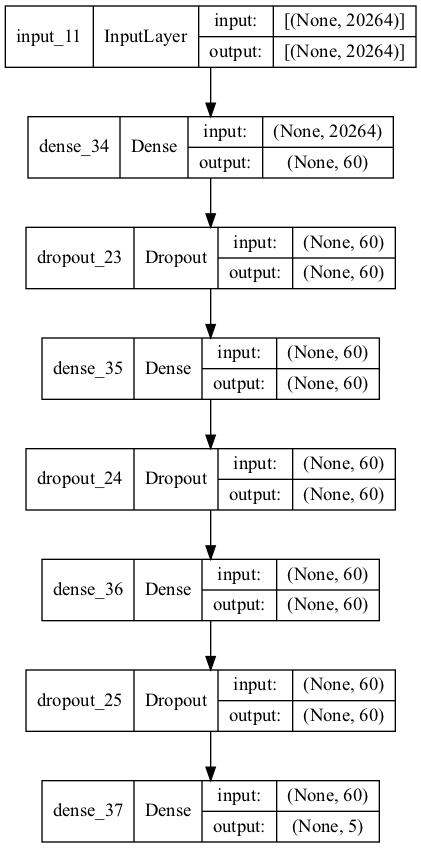

In [303]:
tf.keras.utils.plot_model(model, to_file="output/model.png", show_shapes=True)

In [304]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
          x=X_train, 
          y=Y_train, 
          epochs=25,
          batch_size=32,
          validation_data=(X_test, Y_test),
          use_multiprocessing=True, 
          workers=-1, 
          callbacks=[tensorboard_callback]
)

Epoch 1/25


2022-01-09 14:31:39.105138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/18 [=========================>....] - ETA: 0s - loss: 1.5594 - accuracy: 0.3281

2022-01-09 14:31:39.662925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 35ms/step - loss: 1.5474 - accuracy: 0.3357 - val_loss: 1.3814 - val_accuracy: 0.3734
Epoch 2/25
18/18 [==============================] - 0s 22ms/step - loss: 1.2130 - accuracy: 0.4839 - val_loss: 0.7797 - val_accuracy: 0.9834
Epoch 3/25
18/18 [==============================] - 0s 21ms/step - loss: 0.4969 - accuracy: 0.8518 - val_loss: 0.1673 - val_accuracy: 0.9751
Epoch 4/25
18/18 [==============================] - 0s 21ms/step - loss: 0.1442 - accuracy: 0.9661 - val_loss: 0.0433 - val_accuracy: 0.9959
Epoch 5/25
18/18 [==============================] - 0s 21ms/step - loss: 0.0507 - accuracy: 0.9911 - val_loss: 0.0346 - val_accuracy: 0.9876
Epoch 6/25
18/18 [==============================] - 0s 22ms/step - loss: 0.0529 - accuracy: 0.9893 - val_loss: 0.0301 - val_accuracy: 0.9876
Epoch 7/25
18/18 [==============================] - 0s 24ms/step - loss: 0.0569 - accuracy: 0.9857 - val_loss: 0.0170 - val_accuracy: 0.9959
Epoch 8/25
18/18 [======

In [305]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 44828), started 1 day, 3:56:38 ago. (Use '!kill 44828' to kill it.)

In [306]:
Z = model.predict(X_test)

2022-01-09 14:31:49.758202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [307]:
accuracy_score(np.argmax(Z, axis = 1),np.argmax(Y_test, axis = 1))

0.995850622406639

In [308]:
pd.crosstab(np.argmax(Z, axis = 1),np.argmax(Y_test, axis = 1))

col_0,0,1,2,3,4
row_0,,,,,
0,41,0,0,0,0
1,0,41,0,0,0
2,0,1,90,0,0
3,0,0,0,44,0
4,0,0,0,0,24


In [309]:
filename = 'output/finalized_model_ANN.sav'

In [310]:
# Create file model
joblib.dump(model, filename)

INFO:tensorflow:Assets written to: ram://24c6a67f-d01a-418e-bef6-b0192d87d0b8/assets


['output/finalized_model_ANN.sav']

In [311]:
# load the model from disk
loaded_model = joblib.load(filename)

In [312]:
result = loaded_model.predict(X_test)

2022-01-09 14:31:50.739195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [313]:
accuracy_score(np.argmax(result, axis = 1),np.argmax(Y_test, axis = 1))

0.995850622406639

## Using XGBoost

### Formatting data

In [314]:
y = LabelEncoder()
Y_bis = y.fit_transform(Y)
Y_bis

array([4, 3, 4, 4, 0, 4, 2, 4, 0, 4, 0, 2, 4, 0, 0, 0, 3, 2, 2, 4, 0, 2,
       3, 0, 2, 3, 1, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 3, 0, 0, 2, 4, 4, 2,
       2, 0, 4, 1, 0, 3, 0, 3, 0, 4, 1, 0, 0, 1, 2, 0, 3, 2, 0, 3, 4, 1,
       0, 4, 2, 0, 2, 0, 0, 3, 0, 3, 0, 2, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0,
       2, 0, 4, 4, 0, 0, 0, 4, 1, 0, 4, 0, 0, 2, 0, 2, 3, 2, 3, 1, 3, 3,
       4, 0, 3, 4, 0, 2, 2, 2, 0, 0, 3, 2, 3, 0, 4, 4, 4, 0, 2, 3, 1, 0,
       1, 0, 0, 2, 3, 0, 2, 1, 0, 4, 0, 2, 3, 1, 4, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 4, 4, 3, 4, 3, 2, 0, 4, 3, 1, 2, 3, 0, 2, 3, 0, 3, 0, 0,
       0, 4, 0, 2, 1, 2, 0, 4, 4, 4, 3, 3, 0, 3, 3, 2, 3, 4, 3, 0, 0, 0,
       3, 3, 0, 2, 2, 2, 2, 4, 0, 4, 0, 3, 3, 0, 4, 0, 4, 0, 0, 0, 3, 0,
       2, 3, 2, 2, 3, 0, 2, 4, 0, 3, 3, 4, 1, 0, 2, 4, 2, 1, 0, 2, 2, 3,
       4, 4, 3, 3, 2, 0, 0, 1, 0, 4, 1, 0, 4, 2, 4, 4, 4, 0, 1, 1, 3, 1,
       1, 4, 3, 0, 0, 2, 2, 0, 1, 4, 2, 4, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 4, 0,

In [315]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_bis, test_size=0.3, random_state=42, stratify=Y_bis)

### Creating Model

In [334]:
xgb_model = xgb.XGBClassifier(objective='multi:softprob', random_state = 0, nthread = -1)

In [335]:
# make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "learning_rate" : [0.001, 0.01, 0.1]
}

In [336]:
# make a GridSearchCV object
GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = "accuracy", #sklearn.metrics.SCORERS.keys()
                  cv = 3,
                  n_jobs=-1,
                  verbose = 4)

In [337]:
GS.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/minif

[14:49:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:15] WARNING: /Users/runner/miniforge3/c

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:53:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.984 total time= 4.1min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END learning_rate=0.001, max_depth=3, n_estimators=100;, score=0.995 total time= 4.1min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:53:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.984 total time= 8.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.995 total time= 8.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END learning_rate=0.001, max_depth=3, n_estimators=200;, score=0.989 total time= 8.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END learning_rate=0.001, max_depth=6, n_estimators=100;, score=0.984 total time= 4.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END learning_rate=0.001, max_depth=6, n_estimators=100;, score=0.995 total time= 4.2min
[14:57:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.001, max_depth=6,

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:01:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.001, max_depth=6, n_estimators=200;, score=0.984 total time= 8.3min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.001, max_depth=6, n_estimators=200;, score=0.989 total time= 8.5min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END learning_rate=0.001, max_depth=6, n_estimators=200;, score=0.995 total time= 8.5min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.001, max_depth=3, n_estimators=500;, score=0.989 total time=20.6min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.001, max_depth=3, n_estimators=500;, score=0.989 total time=20.6min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.001, max_depth=9, n_estimators=100;, score=0.984 total time= 4.0min
[CV 2/3] END learning_rate=0.001, max_depth=9, n_estimators=100;, score=0.995 total time= 4.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.001, max_depth=3, n_estimators=500;, score=0.984 total time=20.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:13:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.001, max_depth=9, n_estimators=100;, score=0.989 total time= 3.9min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:13:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.001, max_depth=9, n_estimators=200;, score=0.984 total time= 7.8min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.001, max_depth=9, n_estimators=200;, score=0.989 total time= 8.1min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END learning_rate=0.001, max_depth=6, n_estimators=500;, score=0.989 total time=20.5min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.001, max_depth=9, n_estimators=200;, score=0.995 total time= 8.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.001, max_depth=6, n_estimators=500;, score=0.989 total time=20.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.989 total time= 4.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.984 total time= 4.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.989 total time= 4.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:22:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.001, max_depth=6, n_estimators=500;, score=0.984 total time=19.4min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.995 total time= 7.8min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.984 total time= 7.7min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.989 total time= 8.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=0.989 total time=20.4min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.989 total time= 4.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=0.989 total time=20.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.989 total time= 4.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:33:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.01, max_depth=6, n_estimators=100;, score=0.984 total time= 4.0min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=0.984 total time=19.8min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.984 total time=17.6min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.01, max_depth=6, n_estimators=200;, score=0.995 total time= 7.5min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.01, max_depth=6, n_estimators=200;, score=0.984 total time= 7.4min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.01, max_depth=6, n_estimators=200;, score=0.989 total time= 7.7min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.989 total time=17.9min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=0.989 total time= 3.8min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=0.989 total time= 3.9min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=0.984 total time= 3.8min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.984 total time=17.1min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.01, max_depth=9, n_estimators=200;, score=0.995 total time= 7.4min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.01, max_depth=9, n_estimators=200;, score=0.984 total time= 7.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:52:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.01, max_depth=9, n_estimators=200;, score=0.989 total time= 7.5min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:52:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.01, max_depth=6, n_estimators=500;, score=0.984 total time=16.4min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:53:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.01, max_depth=6, n_estimators=500;, score=0.989 total time=16.9min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.989 total time= 2.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.995 total time= 2.3min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:54:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.01, max_depth=6, n_estimators=500;, score=0.984 total time=16.3min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.989 total time= 2.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:56:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.989 total time= 3.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:57:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.995 total time= 3.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:57:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.989 total time= 3.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:57:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.989 total time= 2.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:59:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.995 total time= 2.2min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.01, max_depth=9, n_estimators=500;, score=0.984 total time=15.3min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:00:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.989 total time= 5.8min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.989 total time= 1.8min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.01, max_depth=9, n_estimators=500;, score=0.989 total time=15.3min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.995 total time= 5.8min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.989 total time= 2.7min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:02:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.989 total time= 5.7min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.995 total time= 2.7min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:03:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.989 total time= 2.7min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 3/3] END learning_rate=0.01, max_depth=9, n_estimators=500;, score=0.984 total time=13.9min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:04:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.989 total time= 1.8min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.989 total time= 1.7min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 2/3] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.995 total time= 1.7min
[16:05:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END learning_rate=0.1, max_depth=9, n_estimators=200;, score=0.989 total time= 2.4min


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV 1/3] END learning_rate=0.1, max_depth=6, n_estimators=500;, score=0.989 total time= 5.0min
[16:06:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END learning_rate=0.1, max_depth=9, n_estimators=200;, score=0.995 total time= 2.4min
[CV 3/3] END learning_rate=0.1, max_depth=9, n_estimators=200;, score=0.989 total time= 2.3min
[CV 3/3] END learning_rate=0.1, max_depth=6, n_estimators=500;, score=0.989 total time= 4.9min
[CV 2/3] END learning_rate=0.1, max_depth=6, n_estimators=500;, score=0.995 total time= 4.9min
[CV 1/3] END learning_rate=0.1, max_depth=9, n_estimators=500;, score=0.989 total time= 2.7min
[CV 2/3] END learning_rate=0.1, max_depth=9, n_estimators=500;, score=0.995 total time= 2.7min
[CV 3/3] END lear

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:07:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None,
                                     random_state=0, reg_alpha=No

In [338]:
GS.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8, nthread=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [339]:
GS.best_params_ # to get only the best hyperparameter values that we searched for

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [340]:
print(GS.best_score_) # score according to the metric we passed

0.9910681770264312


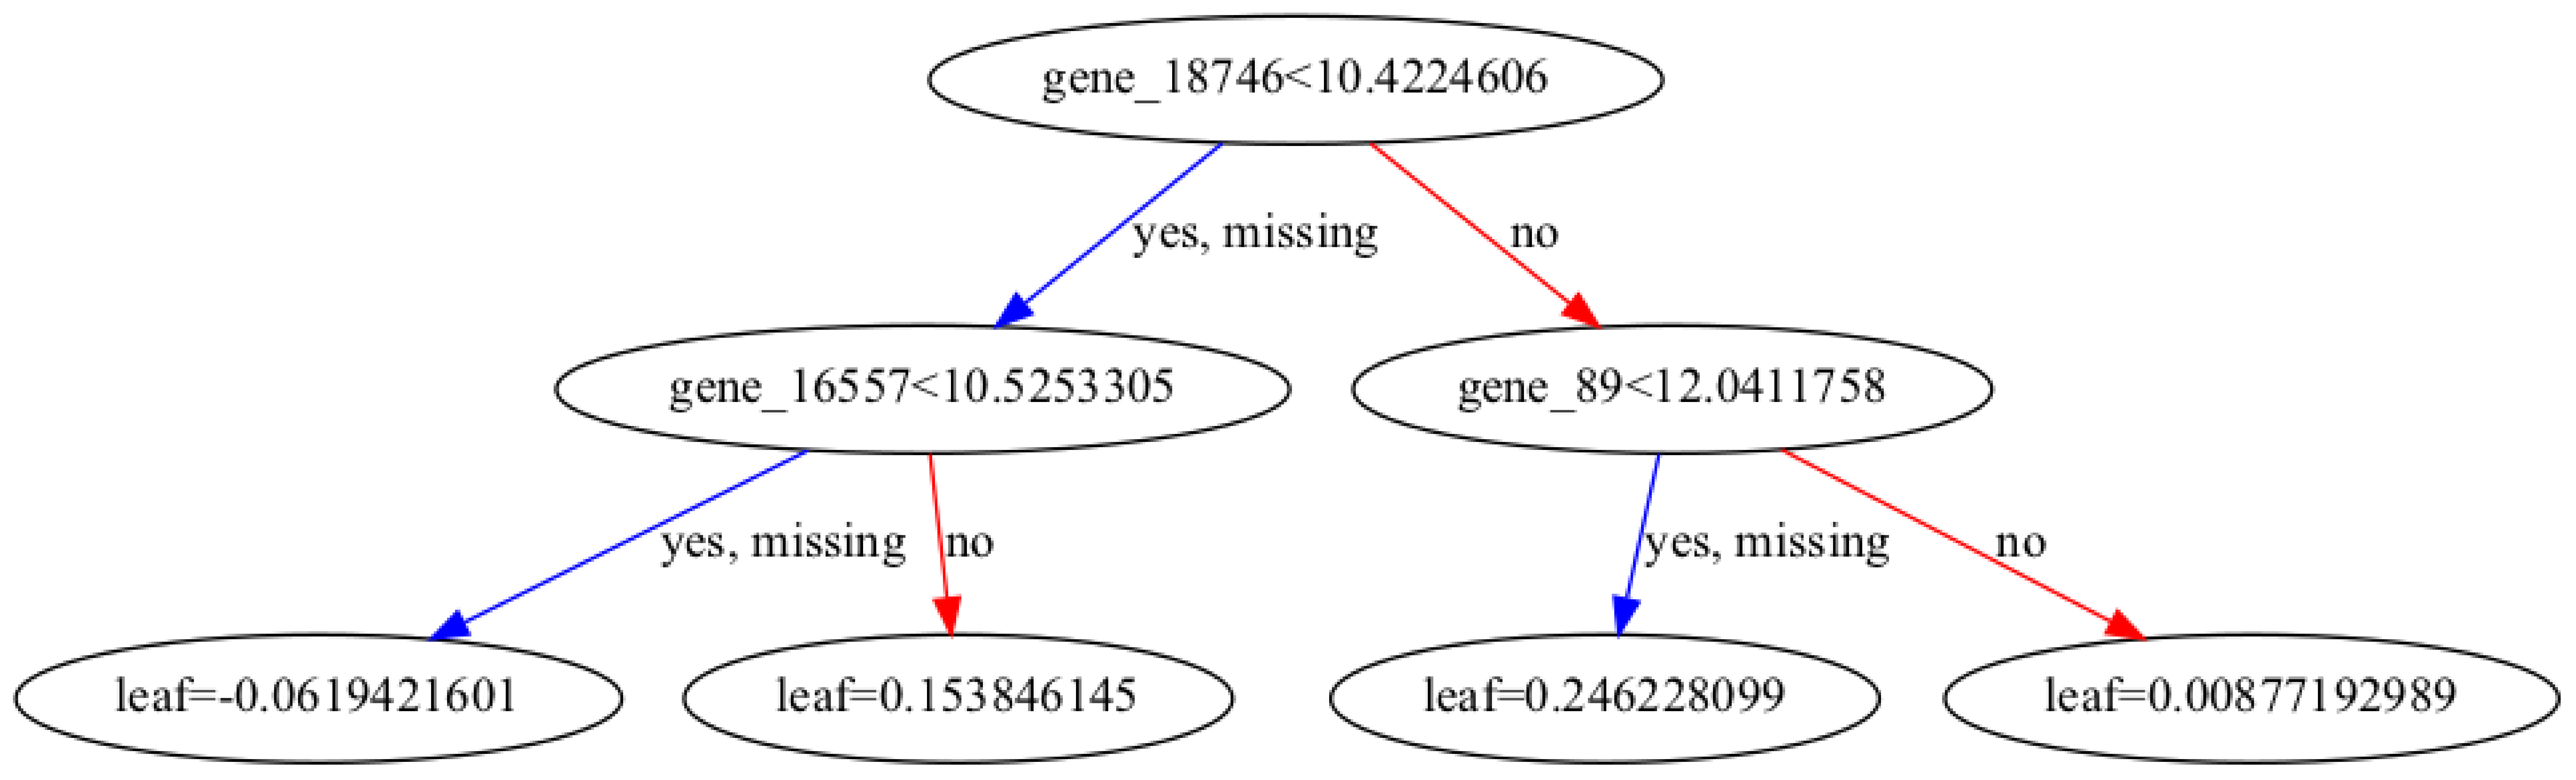

In [349]:
plot_tree(GS.best_estimator_)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('output/tree.png')
plt.show()


In [ ]:
filename = 'output/finalized_model_XGB.sav'

In [ ]:
# Create file model
joblib.dump(GS.best_estimator_, filename)

['output/finalized_model_XGB.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)

In [ ]:
result = loaded_model.score(X_test, Y_test)
print(result)

0.991701244813278


## Other trials

In [ ]:
# def create_model():
#     init = 'random_uniform'
#     model = Sequential()
#     model.add(Input(shape=(20264,)))
#     model.add(Dense(100, activation = 'relu', kernel_initializer = init))
#     model.add(Dense(50, activation = 'relu', kernel_initializer = init))
#     model.add(Dense(5, activation = 'softmax', kernel_initializer = init))
    
#     return model

In [ ]:
# model = create_model()
# model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# model.fit(x=X_train, 
#           y=Y_train, 
#           epochs=100,
#           batch_size=32,
#           validation_data=(X_test, Y_test),
#           use_multiprocessing=True, 
#           workers=-1, 
#           callbacks=[tensorboard_callback])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2.3251 - accuracy: 0.3409

2022-01-06 00:48:53.326721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/18 [=========================>....] - ETA: 0s - loss: 2.0553 - accuracy: 0.3633

2022-01-06 00:48:53.677873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 30ms/step - loss: 2.0288 - accuracy: 0.3554 - val_loss: 1.5462 - val_accuracy: 0.2573
Epoch 2/100
18/18 [==============================] - 0s 21ms/step - loss: 1.4255 - accuracy: 0.3536 - val_loss: 1.6999 - val_accuracy: 0.3734
Epoch 3/100
18/18 [==============================] - 0s 21ms/step - loss: 1.4833 - accuracy: 0.3357 - val_loss: 1.4330 - val_accuracy: 0.3734
Epoch 4/100
18/18 [==============================] - 0s 22ms/step - loss: 1.4398 - accuracy: 0.3571 - val_loss: 1.6927 - val_accuracy: 0.1743
Epoch 5/100
18/18 [==============================] - 0s 21ms/step - loss: 1.4249 - accuracy: 0.3839 - val_loss: 1.3695 - val_accuracy: 0.3734
Epoch 6/100
18/18 [==============================] - 0s 21ms/step - loss: 1.4909 - accuracy: 0.3571 - val_loss: 1.5681 - val_accuracy: 0.5353
Epoch 7/100
18/18 [==============================] - 0s 20ms/step - loss: 1.4973 - accuracy: 0.4232 - val_loss: 1.4512 - val_accuracy: 0.4440
Epoch 8/100
18/18 

In [ ]:
# %tensorboard --logdir logs/fit

In [ ]:
# Z = model.predict(X_test)

2022-01-06 00:49:35.476672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
# pd.crosstab(np.argmax(Z, axis = 1),np.argmax(Y_test, axis = 1))

col_0,0,1,2,3,4
row_0,,,,,
2,41,42,90,44,24
